In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import RFE



In [ ]:

pga_data = pd.read_csv('/content/drive/MyDrive/pga_data.csv')

pga_data

tour  year  season                      event_name  event_id  \
0      pga  2018    2018  SENTRY TOURNAMENT OF CHAMPIONS        16   
1      pga  2018    2018  SENTRY TOURNAMENT OF CHAMPIONS        16   
2      pga  2018    2018  SENTRY TOURNAMENT OF CHAMPIONS        16   
3      pga  2018    2018  SENTRY TOURNAMENT OF CHAMPIONS        16   
4      pga  2018    2018  SENTRY TOURNAMENT OF CHAMPIONS        16   
...    ...   ...     ...                             ...       ...   
89276  pga  2022    2023                 THE RSM CLASSIC       493   
89277  pga  2022    2023                 THE RSM CLASSIC       493   
89278  pga  2022    2023                 THE RSM CLASSIC       493   
89279  pga  2022    2023                 THE RSM CLASSIC       493   
89280  pga  2022    2023                 THE RSM CLASSIC       493   

           player_name  dg_id fin_text  round_num  \
0      Johnson, Dustin  12422        1          1   
1      Johnson, Dustin  12422        1          2   
2      Johnson, Dustin  12422        1          3   
3      Johnson, Dustin  12422        1          4   
4            Rahm, Jon  19195        2          1   
...                ...    ...      ...        ...   
89276   Nimmer, Bryson  26013      CUT          1   
89277   Nimmer, Bryson  26013      CUT          2   
89278   Willett, Danny  12920       WD          1   
89279   Mullinax, Trey  18761       WD          1   
89280    Lipsky, David  15980       WD          1   

                             course_name  ...  sg_app  sg_ott  sg_t2g  \
0           PLANTATION COURSE AT KAPALUA  ...  -0.610   1.394   2.270   
1           PLANTATION COURSE AT KAPALUA  ...  -0.062   1.190   1.875   
2           PLANTATION COURSE AT KAPALUA  ...   3.488   2.228   5.797   
3           PLANTATION COURSE AT KAPALUA  ...  -0.034   4.088   4.047   
4           PLANTATION COURSE AT KAPALUA  ...  -1.036   1.071   1.006   
...                                  ...  ...     ...     ...     ...   
89276     SEA ISLAND GOLF CLUB (SEASIDE)  ...  -0.059  -0.738  -1.953   
89277  SEA ISLAND GOLF CLUB (PLANTATION)  ...   0.049   0.136   0.150   
89278     SEA ISLAND GOLF CLUB (SEASIDE)  ...  -1.026  -2.391  -3.662   
89279     SEA ISLAND GOLF CLUB (SEASIDE)  ...  -0.404  -1.554  -4.999   
89280     SEA ISLAND GOLF CLUB (SEASIDE)  ...  -1.746   0.647  -0.381   

       sg_total  driving_dist  driving_acc    gir  scrambling  prox_rgh  \
0         2.912         323.8        0.533  0.778       0.636    37.670   
1         2.971         324.4        0.667  0.722       0.667    29.627   
2         5.412         325.5        0.733  0.889       0.600    23.679   
3         5.588         324.9        0.867  0.833       0.857    36.246   
4         0.912         317.0        0.667  0.611       0.636    38.424   
...         ...           ...          ...    ...         ...       ...   
89276    -2.564         266.8        0.643  0.667       0.250    33.532   
89277    -8.707         287.8        0.643  0.667       0.625    42.721   
89278    -2.564         268.0        0.500  0.500       0.667    48.961   
89279    -4.564         293.8        0.429  0.389       0.533    52.103   
89280    -5.564         266.1        0.857  0.500       0.333    74.063   

       prox_fw  
0       42.914  
1       44.661  
2       34.623  
3       46.068  
4       36.003  
...        ...  
89276   44.120  
89277   31.320  
89278   39.355  
89279   38.925  
89280   36.315  

[89281 rows x 25 columns]

In [ ]:
# Check the distribution 
print(pga_data.describe())

               year        season      event_id         dg_id     round_num  \
count  89281.000000  89281.000000  89281.000000  8.928100e+04  89281.000000   
mean    2019.520267   2019.674556    155.430372  1.343907e+04      2.207715   
std        1.738047      1.798078    215.132178  4.760003e+04      1.075587   
min     2017.000000   2017.000000      2.000000  2.400000e+01      1.000000   
25%     2018.000000   2018.000000     11.000000  8.479000e+03      1.000000   
50%     2019.000000   2020.000000     28.000000  1.336700e+04      2.000000   
75%     2021.000000   2021.000000    471.000000  1.671500e+04      3.000000   
max     2022.000000   2023.000000    541.000000  1.000669e+07      4.000000   

         course_num    course_par   round_score       sg_putt        sg_arg  \
count  89281.000000  89281.000000  89281.000000  89281.000000  89281.000000   
mean     514.381526     71.103505     70.733124      0.000892     -0.000061   
std      336.919638      0.849537      3.299570    

In [ ]:

missing_values = pga_data.isna().sum()

# Print the number of missing values for each column
print(missing_values)


tour            0
year            0
season          0
event_name      0
event_id        0
player_name     0
dg_id           0
fin_text        0
round_num       0
course_name     0
course_num      0
course_par      0
round_score     0
sg_putt         0
sg_arg          0
sg_app          0
sg_ott          0
sg_t2g          0
sg_total        0
driving_dist    0
driving_acc     0
gir             0
scrambling      0
prox_rgh        0
prox_fw         0
dtype: int64


In [ ]:
pga_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89281 entries, 0 to 89280
Data columns (total 25 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   tour          89281 non-null  object 
 1   year          89281 non-null  int64  
 2   season        89281 non-null  int64  
 3   event_name    89281 non-null  object 
 4   event_id      89281 non-null  int64  
 5   player_name   89281 non-null  object 
 6   dg_id         89281 non-null  int64  
 7   fin_text      89281 non-null  object 
 8   round_num     89281 non-null  int64  
 9   course_name   89281 non-null  object 
 10  course_num    89281 non-null  int64  
 11  course_par    89281 non-null  int64  
 12  round_score   89281 non-null  int64  
 13  sg_putt       89281 non-null  float64
 14  sg_arg        89281 non-null  float64
 15  sg_app        89281 non-null  float64
 16  sg_ott        89281 non-null  float64
 17  sg_t2g        89281 non-null  float64
 18  sg_total      89281 non-nu

# **Identfying winners**
some visualisations on the overall data


In [ ]:
num_unique_ids = pga_data['dg_id'].nunique()
print(num_unique_ids)


1274


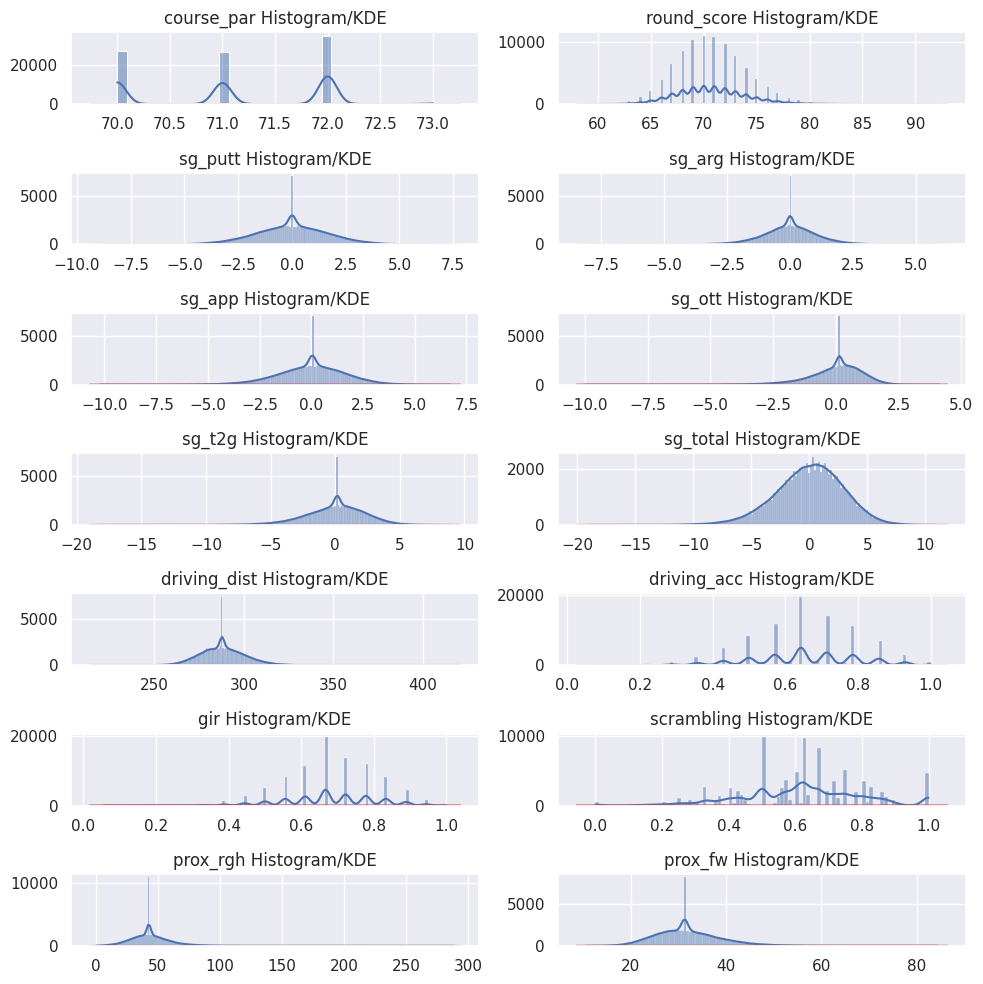

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Subset the data 
subset_data = pga_data[['course_par', 'round_score', 'sg_putt', 'sg_arg', 'sg_app', 'sg_ott',
                        'sg_t2g', 'sg_total', 'driving_dist', 'driving_acc', 'gir',
                        'scrambling', 'prox_rgh', 'prox_fw']]


plt.figure(figsize=(10, 10))

# create a histogram and kernel density plot
for i, col in enumerate(subset_data.columns):
    plt.subplot(7, 2, i+1)
    sns.histplot(data=pga_data, x=col, kde=True)
    sns.kdeplot(data=pga_data, x=col, color='r')
    plt.title(f"{col} Histogram/KDE")
    plt.xlabel("")
    plt.ylabel("")

#sub plot layout
plt.tight_layout()
plt.show()


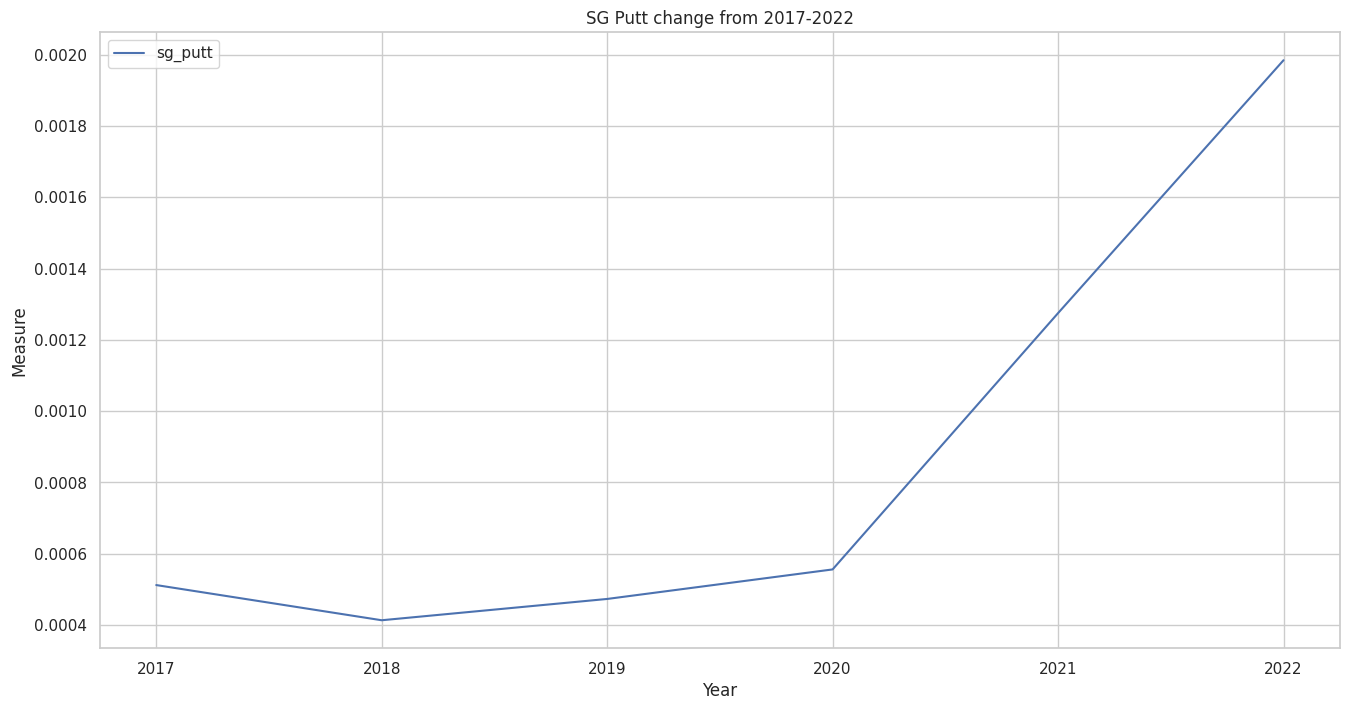

In [ ]:
plt.figure(figsize=(16, 8))
sns.set(style="whitegrid")
sg_putt = ["sg_putt"]
for i in sg_putt:
    x = pga_data.groupby("year")[i].mean()
    ax = sns.lineplot(x=x.index, y=x, label=i)
ax.set_title('SG Putt change from 2017-2022')
ax.set_ylabel('Measure')
ax.set_xlabel('Year')
plt.show()


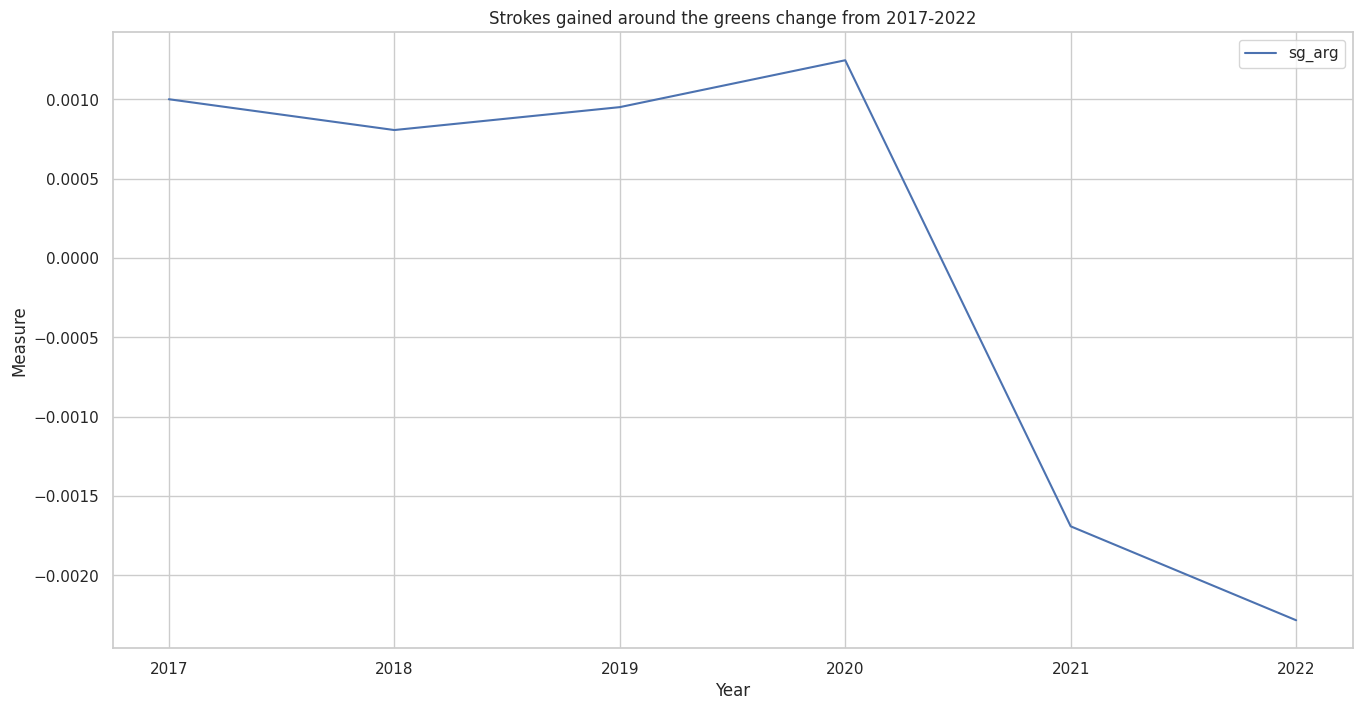

In [ ]:

plt.figure(figsize=(16, 8))
sns.set(style="whitegrid")
sg_arg = ["sg_arg"]
for i in sg_arg:
    x = pga_data.groupby("year")[i].mean()
    ax = sns.lineplot(x=x.index, y=x, label=i)
ax.set_title('Strokes gained around the greens change from 2017-2022')
ax.set_ylabel('Measure')
ax.set_xlabel('Year')
plt.show()

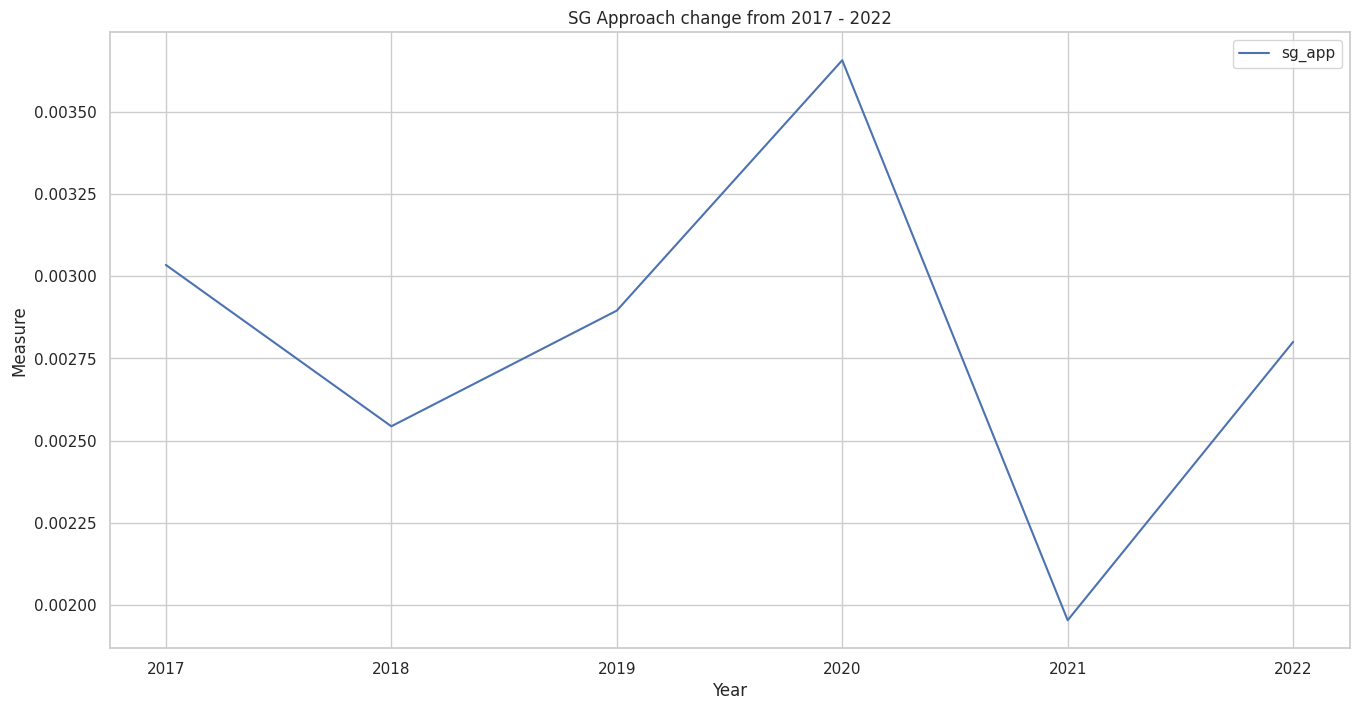

In [ ]:

plt.figure(figsize=(16, 8))
sns.set(style="whitegrid")
sg_app = ["sg_app"]
for i in sg_app:
    x = pga_data.groupby("year")[i].mean()
    ax = sns.lineplot(x=x.index, y=x, label=i)
ax.set_title('SG Approach change from 2017 - 2022')
ax.set_ylabel('Measure')
ax.set_xlabel('Year')
plt.show()

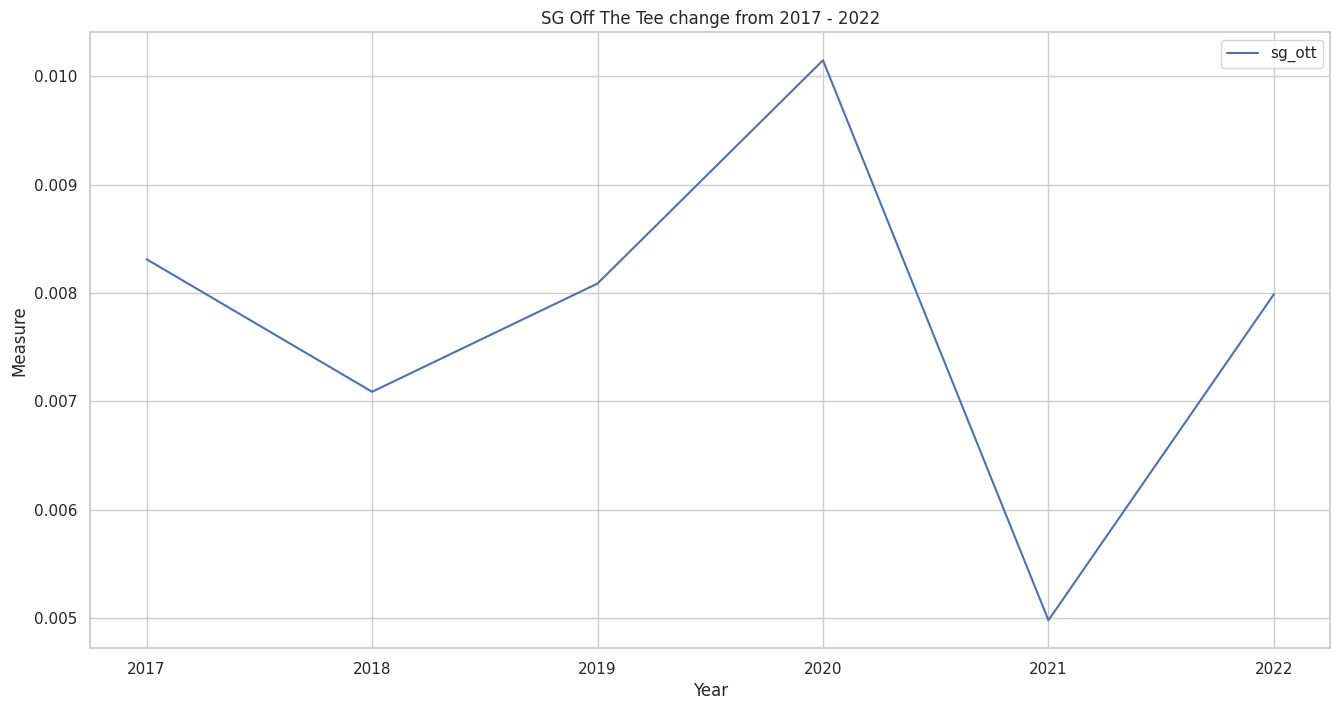

In [ ]:

plt.figure(figsize=(16, 8))
sns.set(style="whitegrid")
sg_ott = ["sg_ott"]
for i in sg_ott:
    x = pga_data.groupby("year")[i].mean()
    ax = sns.lineplot(x=x.index, y=x, label=i)
ax.set_title('SG Off The Tee change from 2017 - 2022')
ax.set_ylabel('Measure')
ax.set_xlabel('Year')
plt.show()

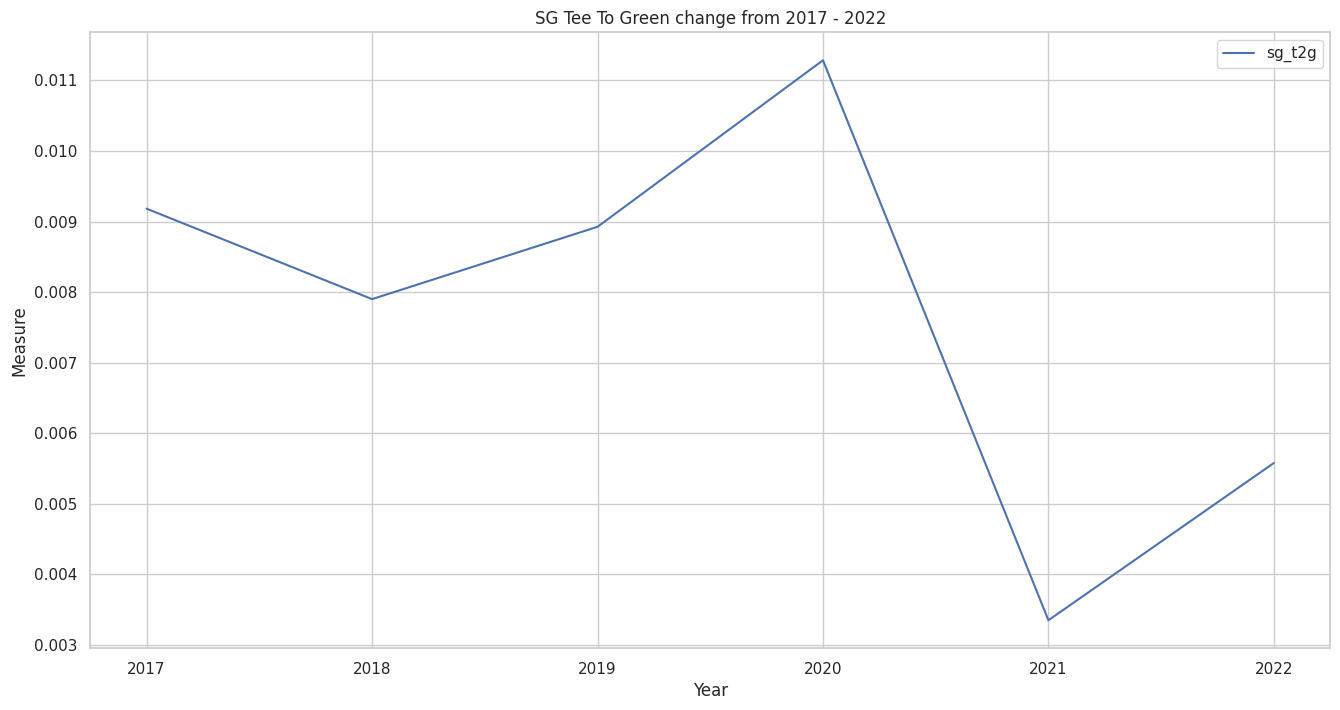

In [ ]:

plt.figure(figsize=(16, 8))
sns.set(style="whitegrid")
sg_t2g = ["sg_t2g"]
for i in sg_t2g:
    x = pga_data.groupby("year")[i].mean()
    ax = sns.lineplot(x=x.index, y=x, label=i)
ax.set_title('SG Tee To Green change from 2017 - 2022')
ax.set_ylabel('Measure')
ax.set_xlabel('Year')
plt.show()

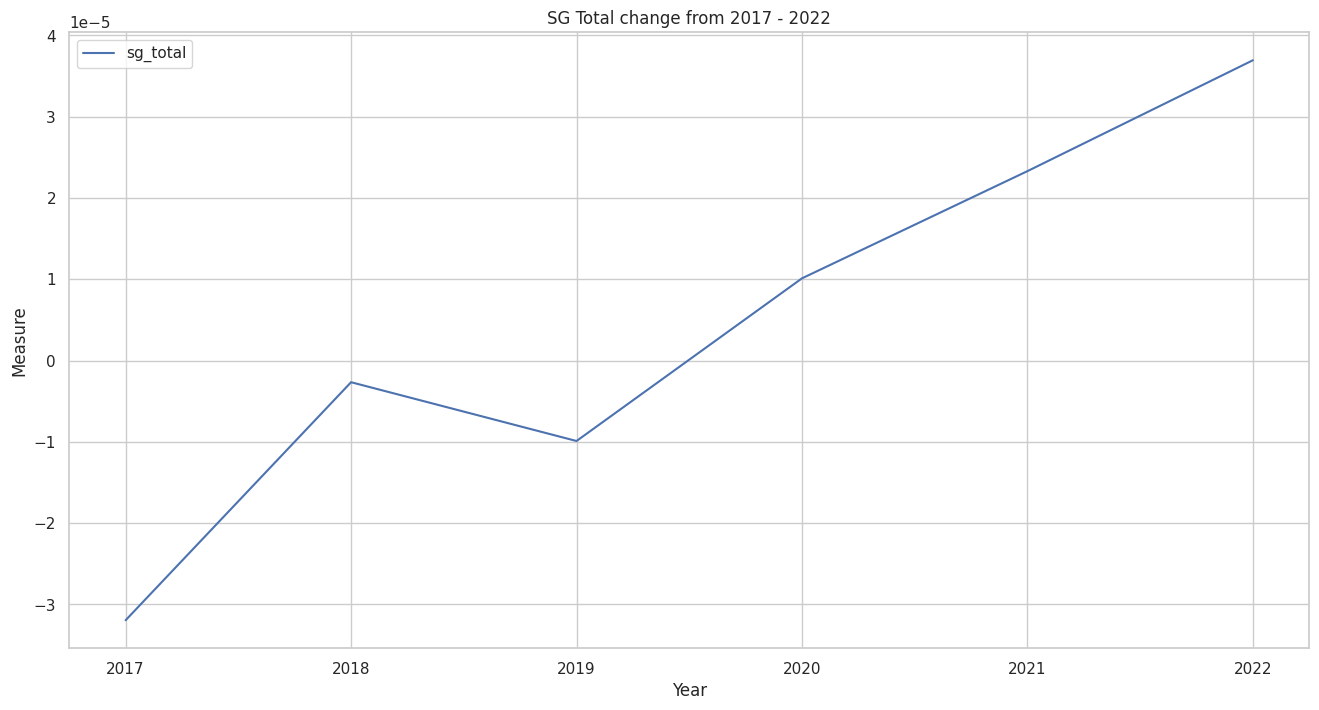

In [ ]:

plt.figure(figsize=(16, 8))
sns.set(style="whitegrid")
sg_total = ["sg_total"]
for i in sg_total:
    x = pga_data.groupby("year")[i].mean()
    ax = sns.lineplot(x=x.index, y=x, label=i)
ax.set_title('SG Total change from 2017 - 2022')
ax.set_ylabel('Measure')
ax.set_xlabel('Year')
plt.show()

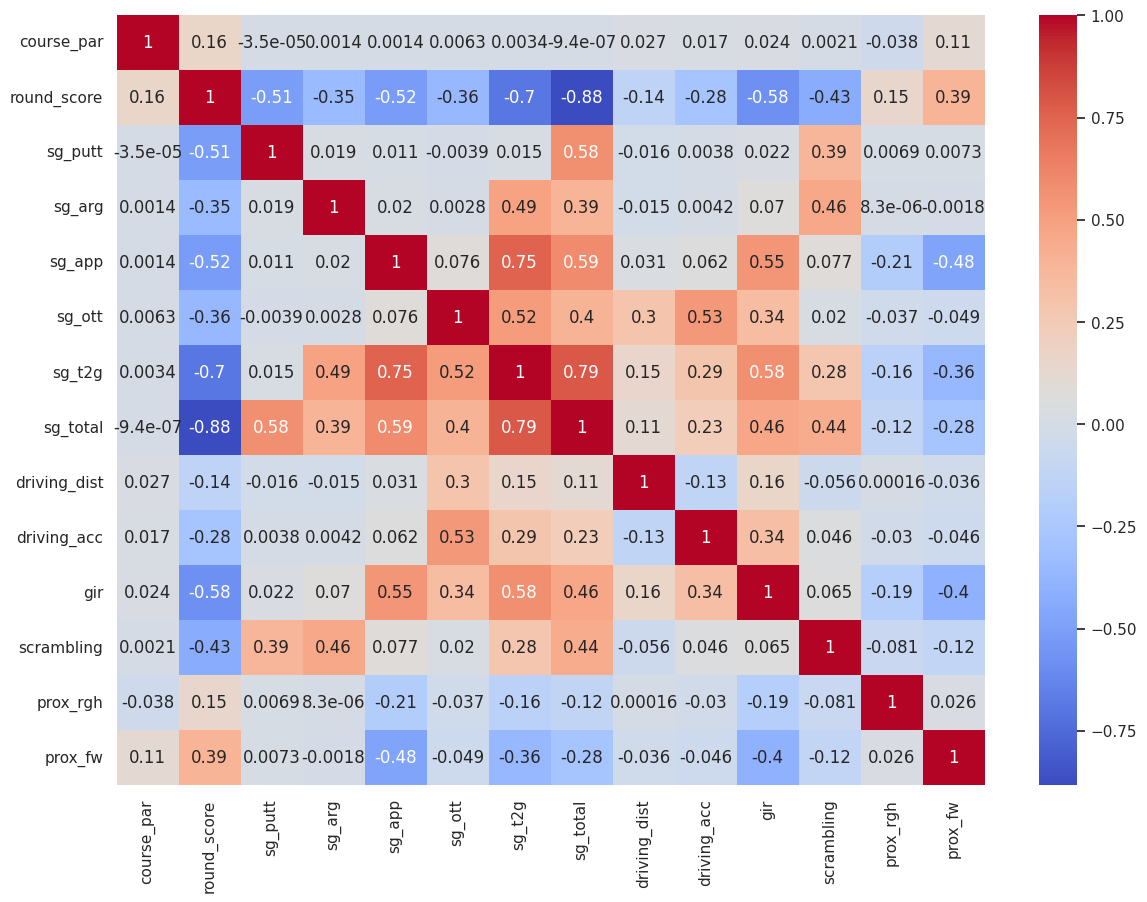

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 10))
corr = pga_data[['course_par', 'round_score', 'sg_putt', 'sg_arg', 'sg_app', 'sg_ott',
       'sg_t2g', 'sg_total', 'driving_dist', 'driving_acc', 'gir',
       'scrambling', 'prox_rgh', 'prox_fw']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()


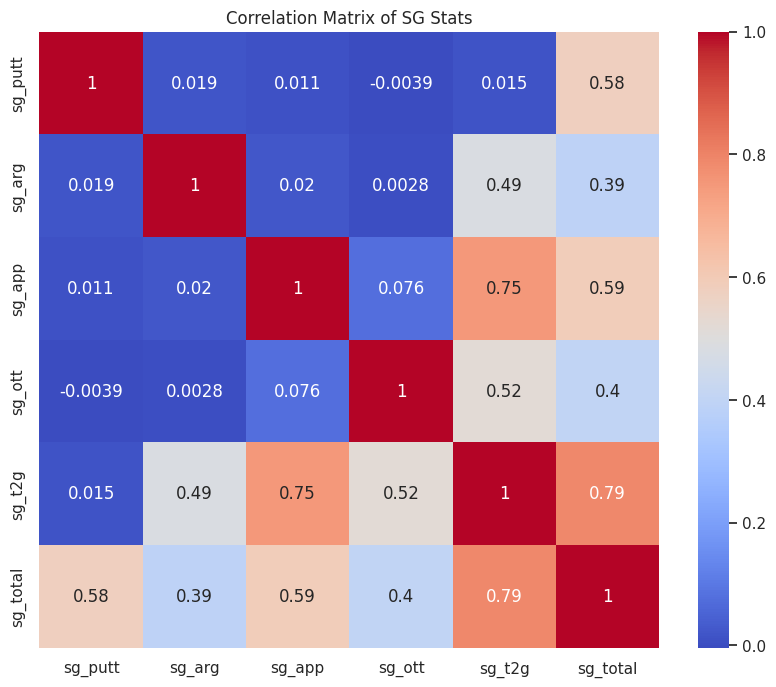

In [ ]:

#correlation matrix cols
sg_cols = ['sg_putt', 'sg_arg', 'sg_app', 'sg_ott', 'sg_t2g', 'sg_total']


corr = pga_data[sg_cols].corr()

#heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of SG Stats')
plt.show()


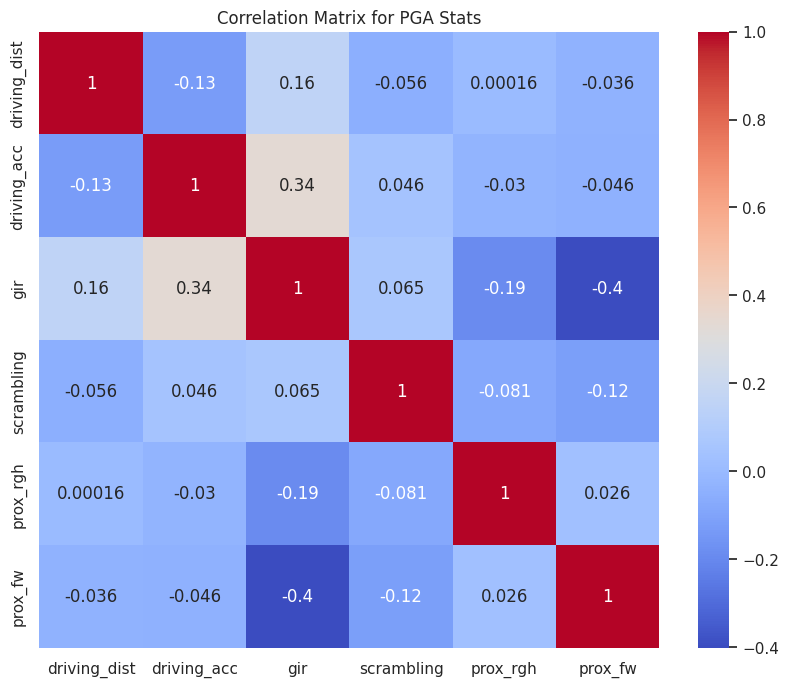

In [ ]:

cols = ['driving_dist', 'driving_acc', 'gir', 'scrambling', 'prox_rgh', 'prox_fw']
subset_df = pga_data[cols]


corr_matrix = subset_df.corr()


plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for PGA Stats')
plt.show()


In [ ]:
pga_data.columns

Index(['tour', 'year', 'season', 'event_name', 'event_id', 'player_name',
       'dg_id', 'fin_text', 'round_num', 'course_name', 'course_num',
       'course_par', 'round_score', 'sg_putt', 'sg_arg', 'sg_app', 'sg_ott',
       'sg_t2g', 'sg_total', 'driving_dist', 'driving_acc', 'gir',
       'scrambling', 'prox_rgh', 'prox_fw'],
      dtype='object')

In [ ]:
#drop the rows where 'fin_text' column contains 'WD', 'DQ', 'D/Q'
pga_data.drop(pga_data[pga_data['fin_text'].isin(['WD', 'DQ', 'D/Q', 'W/D'])].index, inplace=True)

In [ ]:
pga_data

tour  year  season                      event_name  event_id  \
0      pga  2018    2018  SENTRY TOURNAMENT OF CHAMPIONS        16   
1      pga  2018    2018  SENTRY TOURNAMENT OF CHAMPIONS        16   
2      pga  2018    2018  SENTRY TOURNAMENT OF CHAMPIONS        16   
3      pga  2018    2018  SENTRY TOURNAMENT OF CHAMPIONS        16   
4      pga  2018    2018  SENTRY TOURNAMENT OF CHAMPIONS        16   
...    ...   ...     ...                             ...       ...   
89273  pga  2022    2023                 THE RSM CLASSIC       493   
89274  pga  2022    2023                 THE RSM CLASSIC       493   
89275  pga  2022    2023                 THE RSM CLASSIC       493   
89276  pga  2022    2023                 THE RSM CLASSIC       493   
89277  pga  2022    2023                 THE RSM CLASSIC       493   

           player_name  dg_id fin_text  round_num  \
0      Johnson, Dustin  12422        1          1   
1      Johnson, Dustin  12422        1          2   
2      Johnson, Dustin  12422        1          3   
3      Johnson, Dustin  12422        1          4   
4            Rahm, Jon  19195        2          1   
...                ...    ...      ...        ...   
89273       Goya, Tano  10877      CUT          2   
89274  Werenski, Richy  19364      CUT          1   
89275  Werenski, Richy  19364      CUT          2   
89276   Nimmer, Bryson  26013      CUT          1   
89277   Nimmer, Bryson  26013      CUT          2   

                             course_name  ...  sg_app  sg_ott  sg_t2g  \
0           PLANTATION COURSE AT KAPALUA  ...  -0.610   1.394   2.270   
1           PLANTATION COURSE AT KAPALUA  ...  -0.062   1.190   1.875   
2           PLANTATION COURSE AT KAPALUA  ...   3.488   2.228   5.797   
3           PLANTATION COURSE AT KAPALUA  ...  -0.034   4.088   4.047   
4           PLANTATION COURSE AT KAPALUA  ...  -1.036   1.071   1.006   
...                                  ...  ...     ...     ...     ...   
89273  SEA ISLAND GOLF CLUB (PLANTATION)  ...   0.049   0.136   0.150   
89274     SEA ISLAND GOLF CLUB (SEASIDE)  ...   0.837  -0.144  -2.514   
89275  SEA ISLAND GOLF CLUB (PLANTATION)  ...   0.049   0.136   0.150   
89276     SEA ISLAND GOLF CLUB (SEASIDE)  ...  -0.059  -0.738  -1.953   
89277  SEA ISLAND GOLF CLUB (PLANTATION)  ...   0.049   0.136   0.150   

       sg_total  driving_dist  driving_acc    gir  scrambling  prox_rgh  \
0         2.912         323.8        0.533  0.778       0.636    37.670   
1         2.971         324.4        0.667  0.722       0.667    29.627   
2         5.412         325.5        0.733  0.889       0.600    23.679   
3         5.588         324.9        0.867  0.833       0.857    36.246   
4         0.912         317.0        0.667  0.611       0.636    38.424   
...         ...           ...          ...    ...         ...       ...   
89273    -3.707         287.8        0.643  0.667       0.625    42.721   
89274    -3.564         278.7        0.714  0.667       0.375    71.091   
89275    -5.707         287.8        0.643  0.667       0.625    42.721   
89276    -2.564         266.8        0.643  0.667       0.250    33.532   
89277    -8.707         287.8        0.643  0.667       0.625    42.721   

       prox_fw  
0       42.914  
1       44.661  
2       34.623  
3       46.068  
4       36.003  
...        ...  
89273   31.320  
89274   32.874  
89275   31.320  
89276   44.120  
89277   31.320  

[88852 rows x 25 columns]

# Categorising the data 
Based off their finish position

In [ ]:
fin_text_values = pga_data["fin_text"].unique()
print(fin_text_values)


['1' '2' '3' 'T4' 'T7' '9' '10' 'T11' 'T15' 'T17' '20' '21' 'T22' '26'
 'T27' '29' '30' '31' '32' '33' '34' 'T10' 'T14' 'T18' 'T25' 'T32' 'T39'
 'T47' 'T54' 'T58' '64' 'T65' 'T67' 'T69' 'T73' '75' '76' 'CUT' 'T3' 'T6'
 'T8' 'T20' 'T29' 'T36' 'T42' 'T50' 'T57' 'T63' '77' 'T2' '4' '5' 'T12'
 'T23' 'T35' 'T45' 'T51' '66' '72' 'T75' 'T5' 'T9' 'T21' 'T26' 'T31' 'T38'
 'T40' 'T43' 'T48' 'T52' 'T62' '69' 'T70' '6' '7' 'T55' 'T66' 'T68' 'T16'
 'T37' 'T41' 'T49' 'T53' 'T60' '63' 'T64' '67' '11' '12' 'T13' 'T24' 'T33'
 'T46' 'T59' 'T72' 'T74' 'T30' '54' '62' 'T28' '73' '78' '13' '71' '74'
 'T76' 'T80' 'T85' 'T87' '89' '90' '49' '15' '79' '80' '8' 'T34' '81'
 'T82' 'T84' '70' 'T77' 'T79' 'T71' 'T44' 'T56' '65' '68' 'T19' 'T61' '55'
 '82' '56' '23' 'T78' '18' '19' '25' '28' 'T83' '86' '24' '57' '85' 'T81'
 '83' '84' '22' '16' '17' 'MDF' '59' '58' '50' '39' '60' '38' '45' '14'
 '61' 'T98' 'T113' 'T125' 'T134' '139' 'T140' 'T142' '48' '51' '37' '53'
 '43' '52' '41' '46' '47' '27']


In [ ]:
conditions = {'winner':['1','T1'],
              'top 5':['1','T1','2','T2','3','T3','4','T4','5','T5'],
              'top 20':['1','T1','2','T2','3','T3','4','T4','5','T5','6','T6','7','T7','8','T8','9','T9','10','T10','11','T11','12','T12','13','T13','14','T14','15','T15','16','T16','17','T17','18','T18','19','T19','20','T20'],
              'made cut':['1','T1','2','T2','3','T3','4','T4','5','T5','6','T6','7','T7','8','T8','9','T9','10','T10','11','T11','12','T12','13','T13','14','T14','15','T15','16','T16','17','T17','18','T18','19','T19','20','T20','21','22','23','24','25','26','27','28','29','30','31','32','33','34','35','36','37','38','39','40','41','42','43','44','45','46','47','48','49','50','51','52','53','54','55','56','57','58','59','60','61','62','63','64','65','66','67','68','69','70','71','72','73','74','75','76','77','78','79','80','81','82','83','84','85','86','87','89','90','T2','T3','T5','T9','T10','T12','T13','T14','T15','T16','T17','T18','T19','T20','T21','T22','T23','T24','T25','T26','T27','T28','T29','T30','T31','T32','T33','T34','T35','T36','T37','T38','T39','T40','T41','T42','T43','T44','T45','T46','T47','T48','T49','T50','T51','T52','T53','T54','T55','T56','T57','T58','T59','T60','T61','T62','T63','T64','T65','T66','T67','T68','T69','T70','T71','T72','T73','T74','T75','T76','T77','T78','T79','T80','T81','T82','T83','T84','T85','T87','T98','T113','T125','T134','139','T140','T142'],
              'missed cut':['MDF','CUT']}




In [ ]:
pga_data['finish_category'] = pga_data['fin_text'].apply(lambda x: next((k for k, v in conditions.items() if x in v), None))


In [ ]:

conditions_cut = ['MDF', 'CUT']

#create a new column called "CUT?" based on the results in the "fin_text" column
pga_data['CUT?'] = np.where(pga_data['fin_text'].isin(conditions_cut), 'missed cut', 'made cut')

In [ ]:
pga_data['top_5_binary'] = np.where(pga_data['finish_category'].isin(['top 5']), 1, 0)
pga_data['top_20_binary'] = np.where(pga_data['finish_category'].isin(['top 20']), 1, 0)
pga_data['made_cut_binary'] = np.where(pga_data['CUT?'].isin(['made cut']), 1, 0)
pga_data['winner_binary'] = np.where(pga_data['finish_category'].isin(['winner']), 1, 0)


In [ ]:
print(pga_data.isna().sum())


tour               0
year               0
season             0
event_name         0
event_id           0
player_name        0
dg_id              0
fin_text           0
round_num          0
course_name        0
course_num         0
course_par         0
round_score        0
sg_putt            0
sg_arg             0
sg_app             0
sg_ott             0
sg_t2g             0
sg_total           0
driving_dist       0
driving_acc        0
gir                0
scrambling         0
prox_rgh           0
prox_fw            0
finish_category    0
CUT?               0
top_5_binary       0
top_20_binary      0
made_cut_binary    0
winner_binary      0
dtype: int64


In [ ]:
pga_data


tour  year  season                      event_name  event_id  \
0      pga  2018    2018  SENTRY TOURNAMENT OF CHAMPIONS        16   
1      pga  2018    2018  SENTRY TOURNAMENT OF CHAMPIONS        16   
2      pga  2018    2018  SENTRY TOURNAMENT OF CHAMPIONS        16   
3      pga  2018    2018  SENTRY TOURNAMENT OF CHAMPIONS        16   
4      pga  2018    2018  SENTRY TOURNAMENT OF CHAMPIONS        16   
...    ...   ...     ...                             ...       ...   
89273  pga  2022    2023                 THE RSM CLASSIC       493   
89274  pga  2022    2023                 THE RSM CLASSIC       493   
89275  pga  2022    2023                 THE RSM CLASSIC       493   
89276  pga  2022    2023                 THE RSM CLASSIC       493   
89277  pga  2022    2023                 THE RSM CLASSIC       493   

           player_name  dg_id fin_text  round_num  \
0      Johnson, Dustin  12422        1          1   
1      Johnson, Dustin  12422        1          2   
2      Johnson, Dustin  12422        1          3   
3      Johnson, Dustin  12422        1          4   
4            Rahm, Jon  19195        2          1   
...                ...    ...      ...        ...   
89273       Goya, Tano  10877      CUT          2   
89274  Werenski, Richy  19364      CUT          1   
89275  Werenski, Richy  19364      CUT          2   
89276   Nimmer, Bryson  26013      CUT          1   
89277   Nimmer, Bryson  26013      CUT          2   

                             course_name  ...    gir  scrambling  prox_rgh  \
0           PLANTATION COURSE AT KAPALUA  ...  0.778       0.636    37.670   
1           PLANTATION COURSE AT KAPALUA  ...  0.722       0.667    29.627   
2           PLANTATION COURSE AT KAPALUA  ...  0.889       0.600    23.679   
3           PLANTATION COURSE AT KAPALUA  ...  0.833       0.857    36.246   
4           PLANTATION COURSE AT KAPALUA  ...  0.611       0.636    38.424   
...                                  ...  ...    ...         ...       ...   
89273  SEA ISLAND GOLF CLUB (PLANTATION)  ...  0.667       0.625    42.721   
89274     SEA ISLAND GOLF CLUB (SEASIDE)  ...  0.667       0.375    71.091   
89275  SEA ISLAND GOLF CLUB (PLANTATION)  ...  0.667       0.625    42.721   
89276     SEA ISLAND GOLF CLUB (SEASIDE)  ...  0.667       0.250    33.532   
89277  SEA ISLAND GOLF CLUB (PLANTATION)  ...  0.667       0.625    42.721   

       prox_fw  finish_category        CUT?  top_5_binary  top_20_binary  \
0       42.914           winner    made cut             0              0   
1       44.661           winner    made cut             0              0   
2       34.623           winner    made cut             0              0   
3       46.068           winner    made cut             0              0   
4       36.003            top 5    made cut             1              0   
...        ...              ...         ...           ...            ...   
89273   31.320       missed cut  missed cut             0              0   
89274   32.874       missed cut  missed cut             0              0   
89275   31.320       missed cut  missed cut             0              0   
89276   44.120       missed cut  missed cut             0              0   
89277   31.320       missed cut  missed cut             0              0   

       made_cut_binary  winner_binary  
0                    1              1  
1                    1              1  
2                    1              1  
3                    1              1  
4                    1              0  
...                ...            ...  
89273                0              0  
89274                0              0  
89275                0              0  
89276                0              0  
89277                0              0  

[88852 rows x 31 columns]

In [ ]:
#a pivot table to see the distributions of min and max etc
sg_stats = ['sg_putt', 'sg_arg', 'sg_app', 'sg_ott', 'sg_t2g', 'sg_total']

pivot = pga_data.pivot_table(index='finish_category', values=sg_stats, aggfunc=[np.mean, np.min, np.max])

pivot = pivot.round(2)
pivot.columns = [f'{stat}_{agg}' for stat, agg in pivot.columns]

display(pivot)


mean_sg_app  mean_sg_arg  mean_sg_ott  mean_sg_putt  \
finish_category                                                        
made cut                0.04         0.02         0.01          0.03   
missed cut             -0.57        -0.23        -0.26         -0.54   
top 20                  0.59         0.26         0.31          0.56   
top 5                   0.95         0.35         0.51          0.89   
winner                  1.25         0.43         0.69          1.18   

                 mean_sg_t2g  mean_sg_total  amin_sg_app  amin_sg_arg  \
finish_category                                                         
made cut                0.07           0.14       -10.21        -6.52   
missed cut             -1.07          -1.76        -8.74        -8.12   
top 20                  1.16           1.79        -5.67        -4.66   
top 5                   1.80           2.79        -4.63        -4.35   
winner                  2.37           3.71        -3.50        -4.49   

                 amin_sg_ott  amin_sg_putt  amin_sg_t2g  amin_sg_total  \
finish_category                                                          
made cut               -8.68         -8.88       -11.54         -16.03   
missed cut             -9.99         -8.04       -18.30         -17.33   
top 20                 -4.96         -5.11        -7.42          -6.66   
top 5                  -3.19         -4.87        -5.54          -5.04   
winner                 -2.41         -4.80        -5.74          -5.45   

                 amax_sg_app  amax_sg_arg  amax_sg_ott  amax_sg_putt  \
finish_category                                                        
made cut                6.71         5.62         4.11          6.80   
missed cut              5.60         5.05         3.17          5.92   
top 20                  6.46         5.92         3.41          6.99   
top 5                   5.75         5.72         3.35          7.32   
winner                  6.16         4.04         4.09          6.20   

                 amax_sg_t2g  amax_sg_total  
finish_category                              
made cut                8.98           9.92  
missed cut              6.69           7.60  
top 20                  8.51          10.99  
top 5                   7.38          10.53  
winner                  7.86          10.49

In [ ]:
#count the number of rows containing missed cut so i know the classes are balanced
substrings = ['MDF','CUT']
count = pga_data['fin_text'].str.contains('|'.join(substrings)).sum()

print(f"Number of rows containing substrings {substrings}: {count}")

Number of rows containing substrings ['MDF', 'CUT']: 26442


In [ ]:
#count the number of rows containing made cut
substrings = ['made cut']
count = pga_data['finish_category'].str.contains('|'.join(substrings)).sum()

print(f"Number of rows containing substrings {substrings}: {count}")

Number of rows containing substrings ['made cut']: 42509


In [ ]:
counts = pga_data['finish_category'].value_counts()
print(counts)


made cut      42509
missed cut    26442
top 20        14555
top 5          4465
winner          881
Name: finish_category, dtype: int64


In [ ]:
pga_data.columns

Index(['tour', 'year', 'season', 'event_name', 'event_id', 'player_name',
       'dg_id', 'fin_text', 'round_num', 'course_name', 'course_num',
       'course_par', 'round_score', 'sg_putt', 'sg_arg', 'sg_app', 'sg_ott',
       'sg_t2g', 'sg_total', 'driving_dist', 'driving_acc', 'gir',
       'scrambling', 'prox_rgh', 'prox_fw', 'finish_category', 'CUT?',
       'top_5_binary', 'top_20_binary', 'made_cut_binary', 'winner_binary'],
      dtype='object')

In [ ]:
pga_data

tour  year  season                      event_name  event_id  \
0      pga  2018    2018  SENTRY TOURNAMENT OF CHAMPIONS        16   
1      pga  2018    2018  SENTRY TOURNAMENT OF CHAMPIONS        16   
2      pga  2018    2018  SENTRY TOURNAMENT OF CHAMPIONS        16   
3      pga  2018    2018  SENTRY TOURNAMENT OF CHAMPIONS        16   
4      pga  2018    2018  SENTRY TOURNAMENT OF CHAMPIONS        16   
...    ...   ...     ...                             ...       ...   
89273  pga  2022    2023                 THE RSM CLASSIC       493   
89274  pga  2022    2023                 THE RSM CLASSIC       493   
89275  pga  2022    2023                 THE RSM CLASSIC       493   
89276  pga  2022    2023                 THE RSM CLASSIC       493   
89277  pga  2022    2023                 THE RSM CLASSIC       493   

           player_name  dg_id fin_text  round_num  \
0      Johnson, Dustin  12422        1          1   
1      Johnson, Dustin  12422        1          2   
2      Johnson, Dustin  12422        1          3   
3      Johnson, Dustin  12422        1          4   
4            Rahm, Jon  19195        2          1   
...                ...    ...      ...        ...   
89273       Goya, Tano  10877      CUT          2   
89274  Werenski, Richy  19364      CUT          1   
89275  Werenski, Richy  19364      CUT          2   
89276   Nimmer, Bryson  26013      CUT          1   
89277   Nimmer, Bryson  26013      CUT          2   

                             course_name  ...    gir  scrambling  prox_rgh  \
0           PLANTATION COURSE AT KAPALUA  ...  0.778       0.636    37.670   
1           PLANTATION COURSE AT KAPALUA  ...  0.722       0.667    29.627   
2           PLANTATION COURSE AT KAPALUA  ...  0.889       0.600    23.679   
3           PLANTATION COURSE AT KAPALUA  ...  0.833       0.857    36.246   
4           PLANTATION COURSE AT KAPALUA  ...  0.611       0.636    38.424   
...                                  ...  ...    ...         ...       ...   
89273  SEA ISLAND GOLF CLUB (PLANTATION)  ...  0.667       0.625    42.721   
89274     SEA ISLAND GOLF CLUB (SEASIDE)  ...  0.667       0.375    71.091   
89275  SEA ISLAND GOLF CLUB (PLANTATION)  ...  0.667       0.625    42.721   
89276     SEA ISLAND GOLF CLUB (SEASIDE)  ...  0.667       0.250    33.532   
89277  SEA ISLAND GOLF CLUB (PLANTATION)  ...  0.667       0.625    42.721   

       prox_fw  finish_category        CUT?  top_5_binary  top_20_binary  \
0       42.914           winner    made cut             0              0   
1       44.661           winner    made cut             0              0   
2       34.623           winner    made cut             0              0   
3       46.068           winner    made cut             0              0   
4       36.003            top 5    made cut             1              0   
...        ...              ...         ...           ...            ...   
89273   31.320       missed cut  missed cut             0              0   
89274   32.874       missed cut  missed cut             0              0   
89275   31.320       missed cut  missed cut             0              0   
89276   44.120       missed cut  missed cut             0              0   
89277   31.320       missed cut  missed cut             0              0   

       made_cut_binary  winner_binary  
0                    1              1  
1                    1              1  
2                    1              1  
3                    1              1  
4                    1              0  
...                ...            ...  
89273                0              0  
89274                0              0  
89275                0              0  
89276                0              0  
89277                0              0  

[88852 rows x 31 columns]

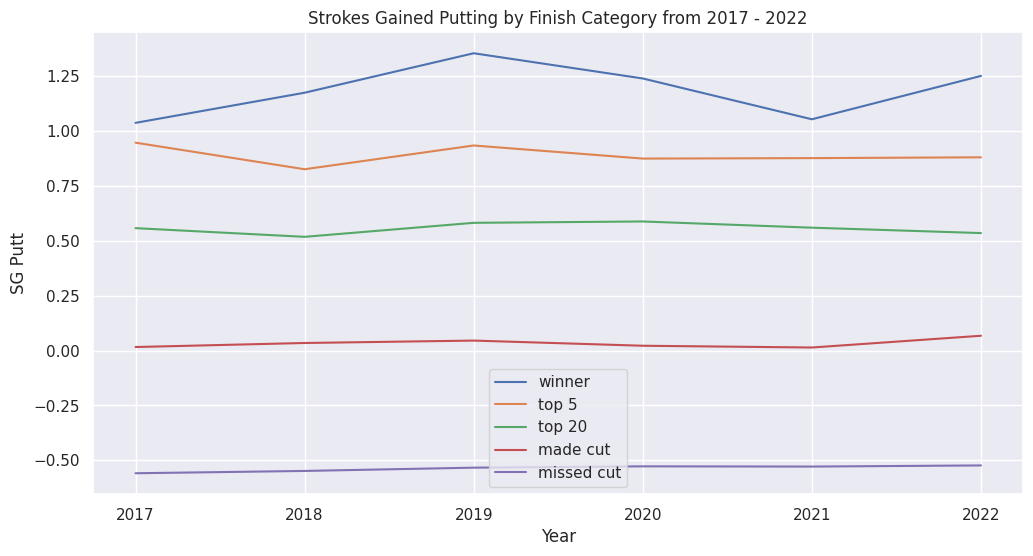

In [ ]:
plt.figure(figsize=(12, 6))
sns.set(style="darkgrid")
for i in pga_data['finish_category'].unique():
    x = pga_data[pga_data['finish_category'] == i].groupby("year")["sg_putt"].mean()
    ax = sns.lineplot(x=x.index, y=x, label=i)
ax.set_title('Strokes Gained Putting by Finish Category from 2017 - 2022')
ax.set_ylabel('SG Putt')
ax.set_xlabel('Year')
plt.show()


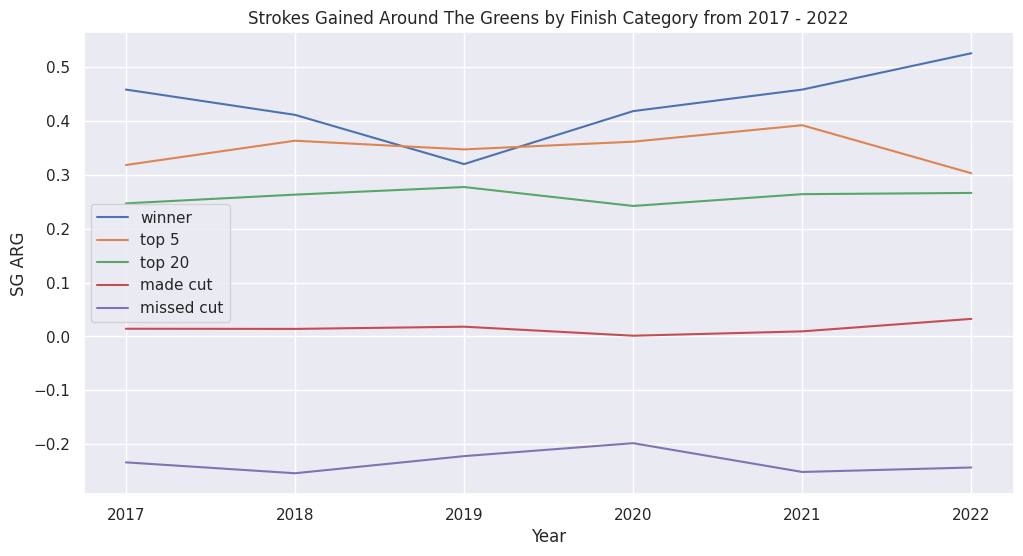

In [ ]:
plt.figure(figsize=(12, 6))
sns.set(style="darkgrid")
for i in pga_data['finish_category'].unique():
    x = pga_data[pga_data['finish_category'] == i].groupby("year")["sg_arg"].mean()
    ax = sns.lineplot(x=x.index, y=x, label=i)
ax.set_title('Strokes Gained Around The Greens by Finish Category from 2017 - 2022')
ax.set_ylabel('SG ARG')
ax.set_xlabel('Year')
plt.show()

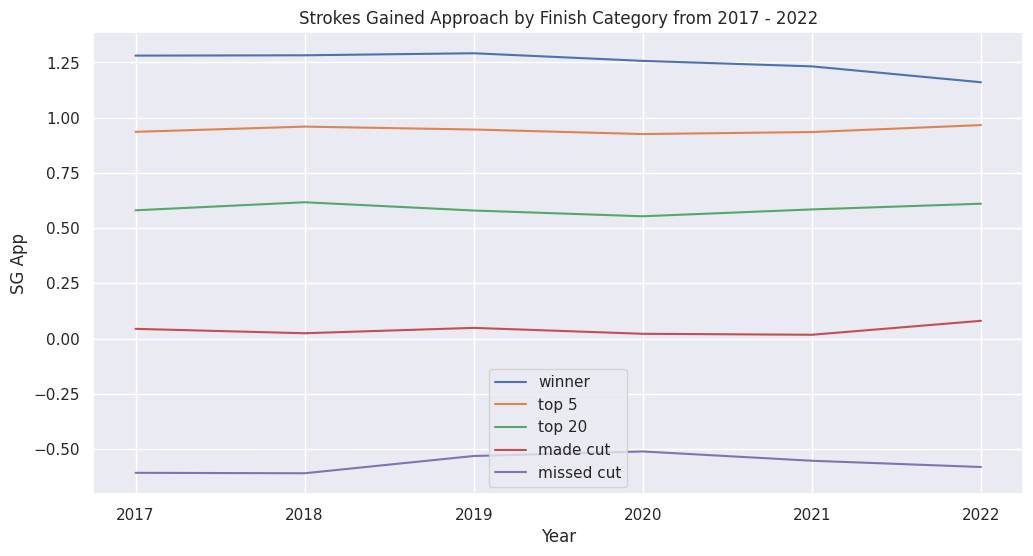

In [ ]:
plt.figure(figsize=(12, 6))
sns.set(style="darkgrid")
for i in pga_data['finish_category'].unique():
    x = pga_data[pga_data['finish_category'] == i].groupby("year")["sg_app"].mean()
    ax = sns.lineplot(x=x.index, y=x, label=i)
ax.set_title('Strokes Gained Approach by Finish Category from 2017 - 2022')
ax.set_ylabel('SG App')
ax.set_xlabel('Year')
plt.show()

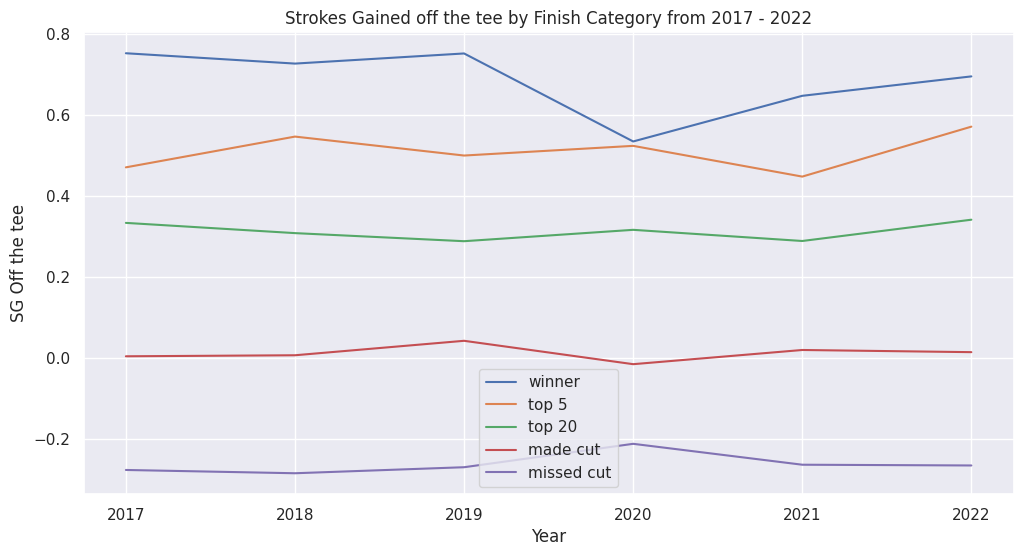

In [ ]:
plt.figure(figsize=(12, 6))
sns.set(style="darkgrid")
for i in pga_data['finish_category'].unique():
    x = pga_data[pga_data['finish_category'] == i].groupby("year")["sg_ott"].mean()
    ax = sns.lineplot(x=x.index, y=x, label=i)
ax.set_title('Strokes Gained off the tee by Finish Category from 2017 - 2022')
ax.set_ylabel('SG Off the tee')
ax.set_xlabel('Year')
plt.show()

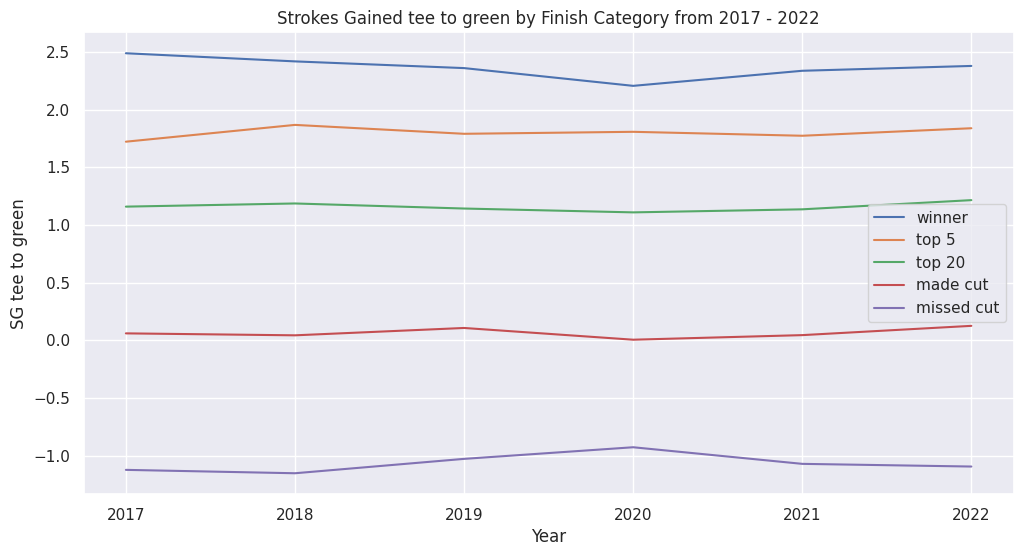

In [ ]:
plt.figure(figsize=(12, 6))
sns.set(style="darkgrid")
for i in pga_data['finish_category'].unique():
    x = pga_data[pga_data['finish_category'] == i].groupby("year")["sg_t2g"].mean()
    ax = sns.lineplot(x=x.index, y=x, label=i)
ax.set_title('Strokes Gained tee to green by Finish Category from 2017 - 2022')
ax.set_ylabel('SG tee to green')
ax.set_xlabel('Year')
plt.show()

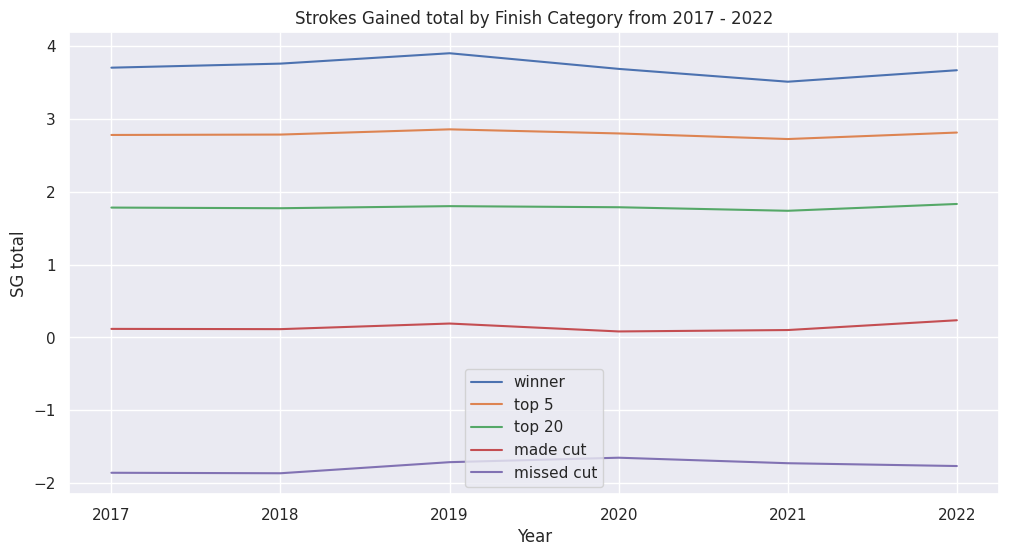

In [ ]:
plt.figure(figsize=(12, 6))
sns.set(style="darkgrid")
for i in pga_data['finish_category'].unique():
    x = pga_data[pga_data['finish_category'] == i].groupby("year")["sg_total"].mean()
    ax = sns.lineplot(x=x.index, y=x, label=i)
ax.set_title('Strokes Gained total by Finish Category from 2017 - 2022')
ax.set_ylabel('SG total')
ax.set_xlabel('Year')
plt.show()

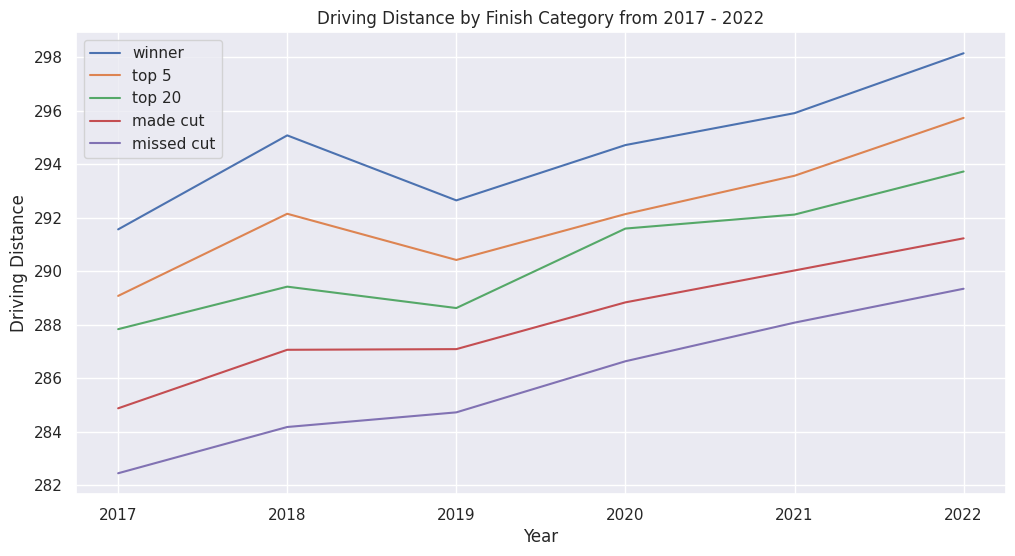

In [ ]:
plt.figure(figsize=(12, 6))
sns.set(style="darkgrid")
for i in pga_data['finish_category'].unique():
    x = pga_data[pga_data['finish_category'] == i].groupby("year")["driving_dist"].mean()
    ax = sns.lineplot(x=x.index, y=x, label=i)
ax.set_title('Driving Distance by Finish Category from 2017 - 2022')
ax.set_ylabel('Driving Distance')
ax.set_xlabel('Year')
plt.show()

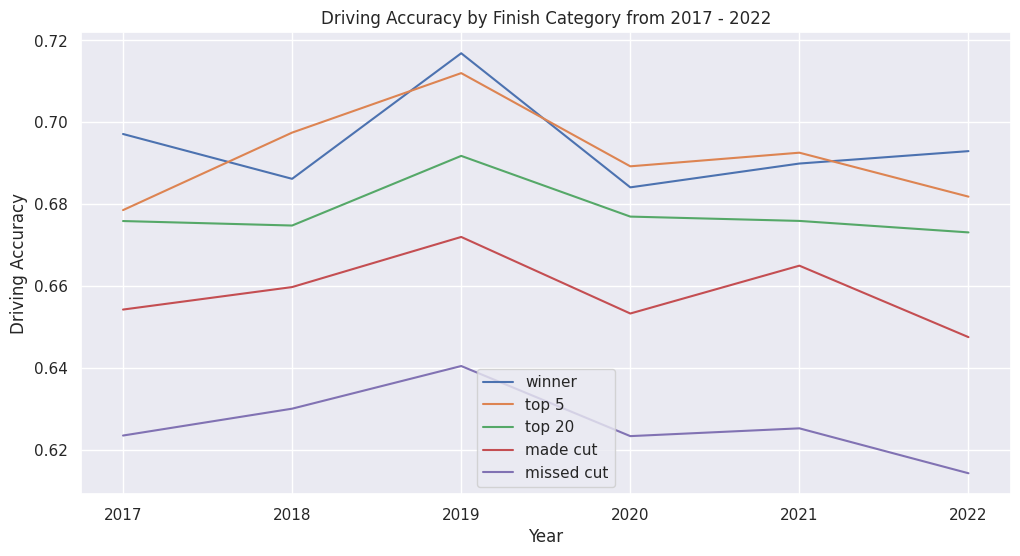

In [ ]:
plt.figure(figsize=(12, 6))
sns.set(style="darkgrid")
for i in pga_data['finish_category'].unique():
    x = pga_data[pga_data['finish_category'] == i].groupby("year")["driving_acc"].mean()
    ax = sns.lineplot(x=x.index, y=x, label=i)
ax.set_title('Driving Accuracy by Finish Category from 2017 - 2022')
ax.set_ylabel('Driving Accuracy')
ax.set_xlabel('Year')
plt.show()

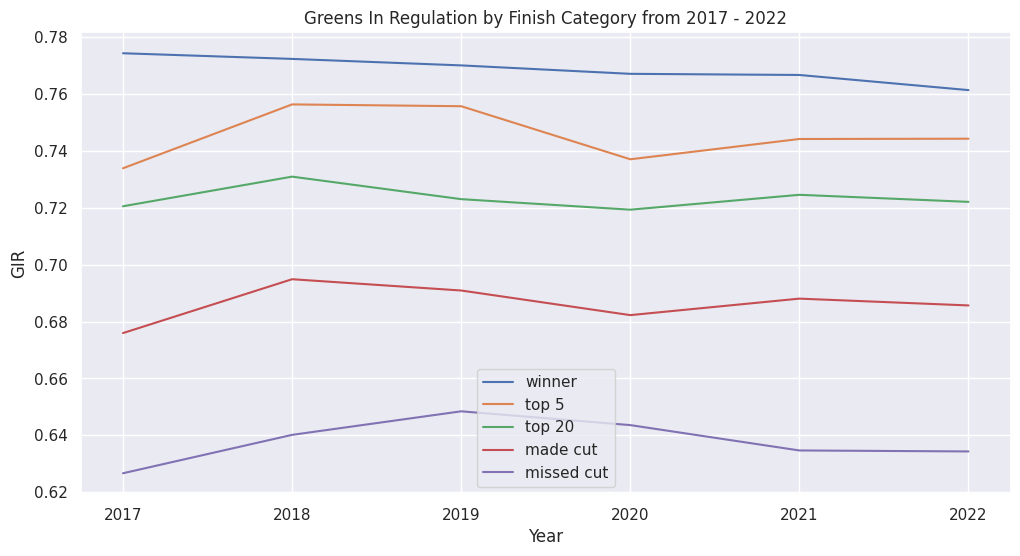

In [ ]:
plt.figure(figsize=(12, 6))
sns.set(style="darkgrid")
for i in pga_data['finish_category'].unique():
    x = pga_data[pga_data['finish_category'] == i].groupby("year")["gir"].mean()
    ax = sns.lineplot(x=x.index, y=x, label=i)
ax.set_title('Greens In Regulation by Finish Category from 2017 - 2022')
ax.set_ylabel('GIR')
ax.set_xlabel('Year')
plt.show()

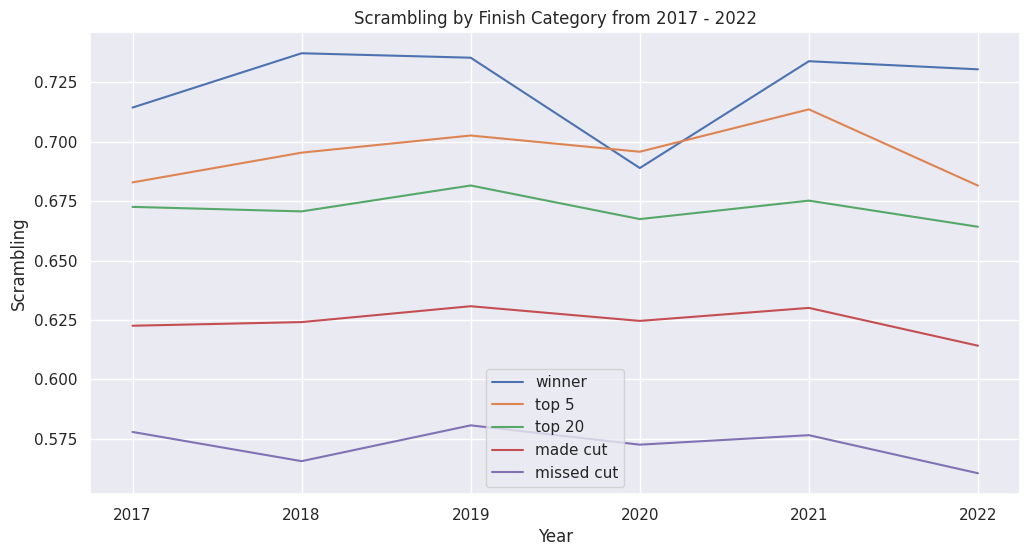

In [ ]:
plt.figure(figsize=(12, 6))
sns.set(style="darkgrid")
for i in pga_data['finish_category'].unique():
    x = pga_data[pga_data['finish_category'] == i].groupby("year")["scrambling"].mean()
    ax = sns.lineplot(x=x.index, y=x, label=i)
ax.set_title('Scrambling by Finish Category from 2017 - 2022')
ax.set_ylabel('Scrambling')
ax.set_xlabel('Year')
plt.show()

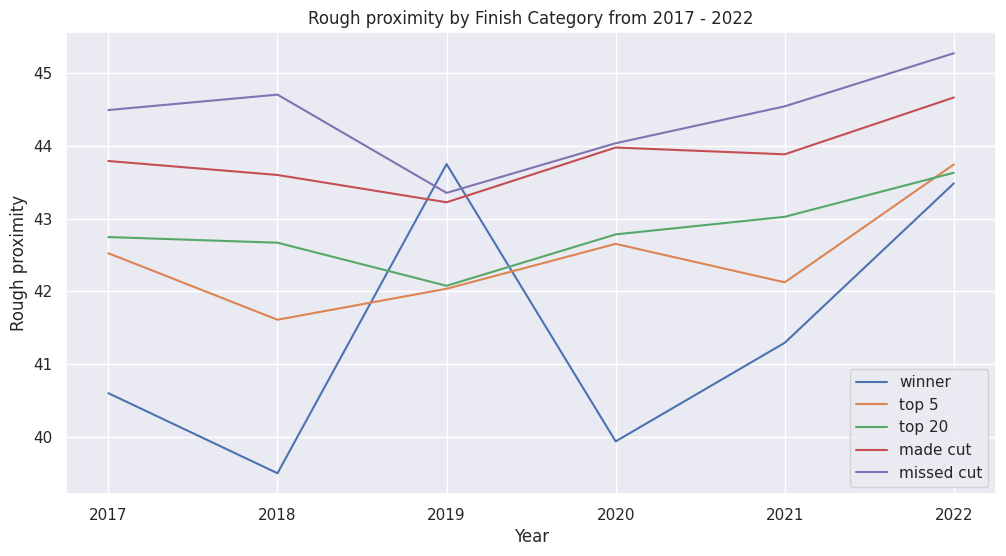

In [ ]:
plt.figure(figsize=(12, 6))
sns.set(style="darkgrid")
for i in pga_data['finish_category'].unique():
    x = pga_data[pga_data['finish_category'] == i].groupby("year")["prox_rgh"].mean()
    ax = sns.lineplot(x=x.index, y=x, label=i)
ax.set_title('Rough proximity by Finish Category from 2017 - 2022')
ax.set_ylabel('Rough proximity')
ax.set_xlabel('Year')
plt.show()

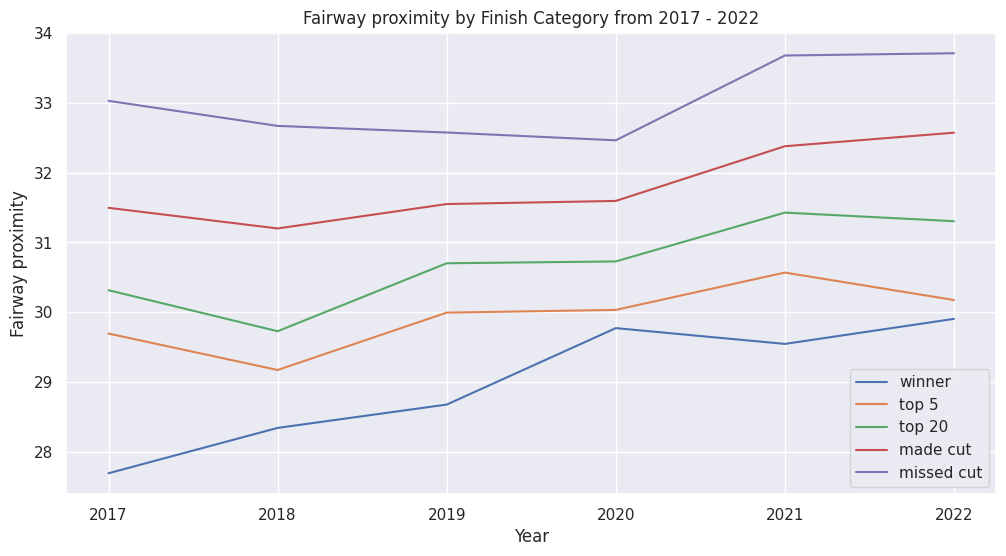

In [ ]:
plt.figure(figsize=(12, 6))
sns.set(style="darkgrid")
for i in pga_data['finish_category'].unique():
    x = pga_data[pga_data['finish_category'] == i].groupby("year")["prox_fw"].mean()
    ax = sns.lineplot(x=x.index, y=x, label=i)
ax.set_title('Fairway proximity by Finish Category from 2017 - 2022')
ax.set_ylabel('Fairway proximity')
ax.set_xlabel('Year')
plt.show()

In [ ]:
pga_data.columns

Index(['tour', 'year', 'season', 'event_name', 'event_id', 'player_name',
       'dg_id', 'fin_text', 'round_num', 'course_name', 'course_num',
       'course_par', 'round_score', 'sg_putt', 'sg_arg', 'sg_app', 'sg_ott',
       'sg_t2g', 'sg_total', 'driving_dist', 'driving_acc', 'gir',
       'scrambling', 'prox_rgh', 'prox_fw', 'finish_category', 'CUT?',
       'top_5_binary', 'top_20_binary', 'made_cut_binary', 'winner_binary'],
      dtype='object')

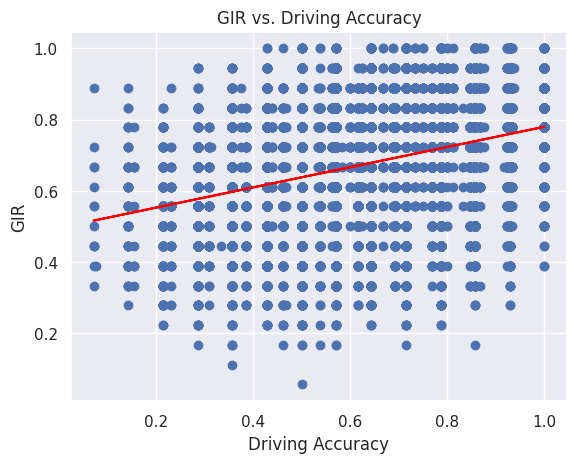

In [ ]:


# Select the data 
gir = pga_data['gir']
driving_acc = pga_data['driving_acc']

#line of best fit 
fit = np.polyfit(driving_acc, gir, 1)
line = fit[0] * driving_acc + fit[1]

#scatter plot
plt.scatter(driving_acc, gir)

#Plot the l best fit line 
plt.plot(driving_acc, line, color='red')


plt.xlabel('Driving Accuracy')
plt.ylabel('GIR')
plt.title('GIR vs. Driving Accuracy')

# Display the plot
plt.show()




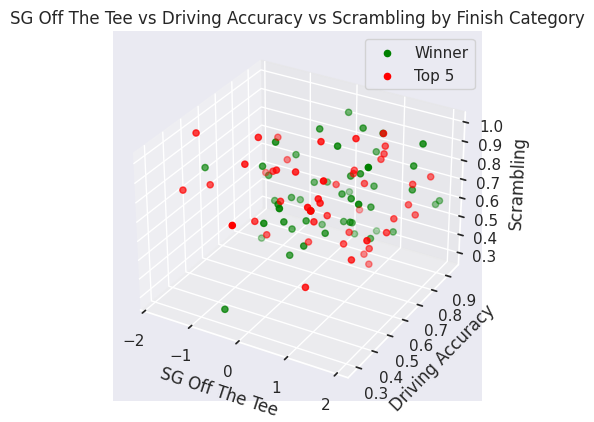

In [ ]:
from mpl_toolkits.mplot3d import Axes3D


#Select  random data points for 'winner' finish category
winner_data = pga_data.loc[pga_data['finish_category'] == 'winner'].sample(n=50, random_state=42)

#Select  random data points for 'top 5' finish category
top5_data = pga_data.loc[pga_data['finish_category'] == 'top 5'].sample(n=50, random_state=42)

# 3D axis
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Create a scatter plot for 'winner' finish category
ax.scatter(winner_data['sg_ott'], winner_data['driving_acc'], winner_data['scrambling'], label='Winner', color='green')

#  scatter plot for 'top 5' finish category
ax.scatter(top5_data['sg_ott'], top5_data['driving_acc'], top5_data['scrambling'], label='Top 5', color='red')

# axis labels and title
ax.set_xlabel('SG Off The Tee')
ax.set_ylabel('Driving Accuracy')
ax.set_zlabel('Scrambling')
ax.set_title('SG Off The Tee vs Driving Accuracy vs Scrambling by Finish Category')


ax.legend()

# Display 
plt.show()


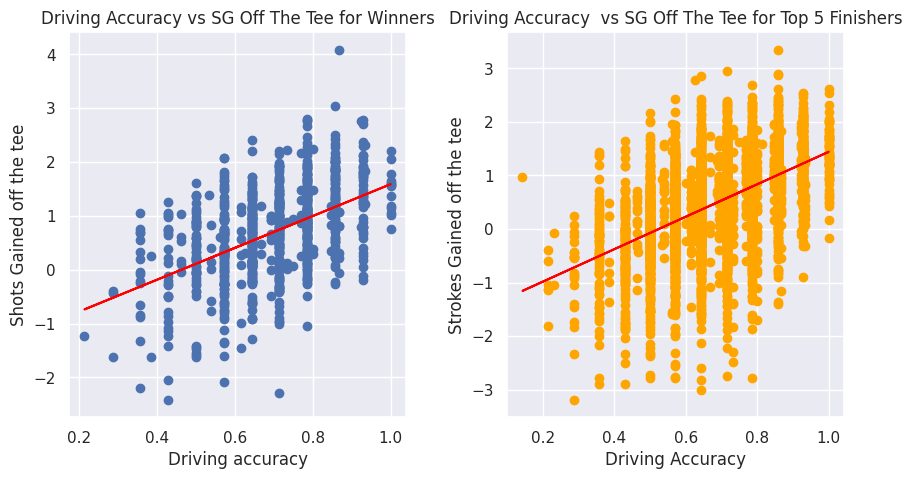

In [ ]:



winner_data = pga_data.loc[pga_data['finish_category'] == 'winner']


top5_data = pga_data.loc[pga_data['finish_category'] == 'top 5']

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))


ax1.scatter(winner_data['driving_acc'], winner_data['sg_ott'])


ax1.set_xlabel('Driving accuracy')
ax1.set_ylabel('Shots Gained off the tee')
ax1.set_title('Driving Accuracy vs SG Off The Tee for Winners')


x = winner_data['driving_acc']
y = winner_data['sg_ott']
m, b = np.polyfit(x, y, 1)
ax1.plot(x, m*x + b, color='red')


ax2.scatter(top5_data['driving_acc'], top5_data['sg_ott'], color='orange')


ax2.set_xlabel('Driving Accuracy')
ax2.set_ylabel('Strokes Gained off the tee')
ax2.set_title('Driving Accuracy  vs SG Off The Tee for Top 5 Finishers')


x = top5_data['driving_acc']
y = top5_data['sg_ott']
m, b = np.polyfit(x, y, 1)
ax2.plot(x, m*x + b, color='red')

# Adjust spacing 
plt.subplots_adjust(wspace=0.3)

# Display the plot
plt.show()


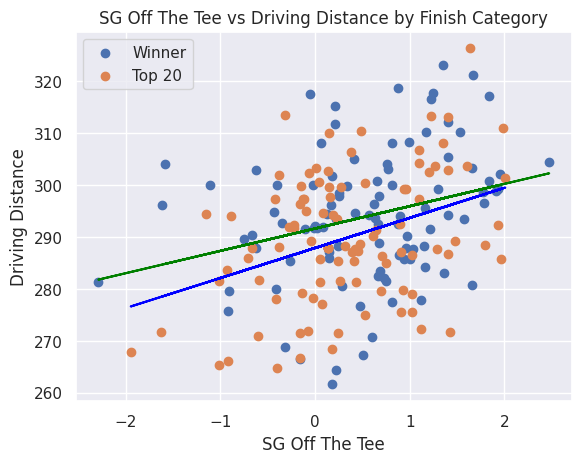

In [ ]:

winner_data = pga_data.loc[pga_data['finish_category'] == 'winner'].sample(n=100, random_state=42)

top20_data = pga_data.loc[pga_data['finish_category'] == 'top 20'].sample(n=100, random_state=42)


winner_coefficients = np.polyfit(winner_data['sg_ott'], winner_data['driving_dist'], 1)
top20_coefficients = np.polyfit(top20_data['sg_ott'], top20_data['driving_dist'], 1)

plt.scatter(winner_data['sg_ott'], winner_data['driving_dist'], label='Winner')
plt.scatter(top20_data['sg_ott'], top20_data['driving_dist'], label='Top 20')

winner_line = np.poly1d(winner_coefficients)
plt.plot(winner_data['sg_ott'], winner_line(winner_data['sg_ott']), color='green')

top20_line = np.poly1d(top20_coefficients)
plt.plot(top20_data['sg_ott'], top20_line(top20_data['sg_ott']), color='blue')

plt.xlabel('SG Off The Tee')
plt.ylabel('Driving Distance')
plt.title('SG Off The Tee vs Driving Distance by Finish Category')
plt.legend()

plt.show()


Text(0, 0.5, 'Finish Category')

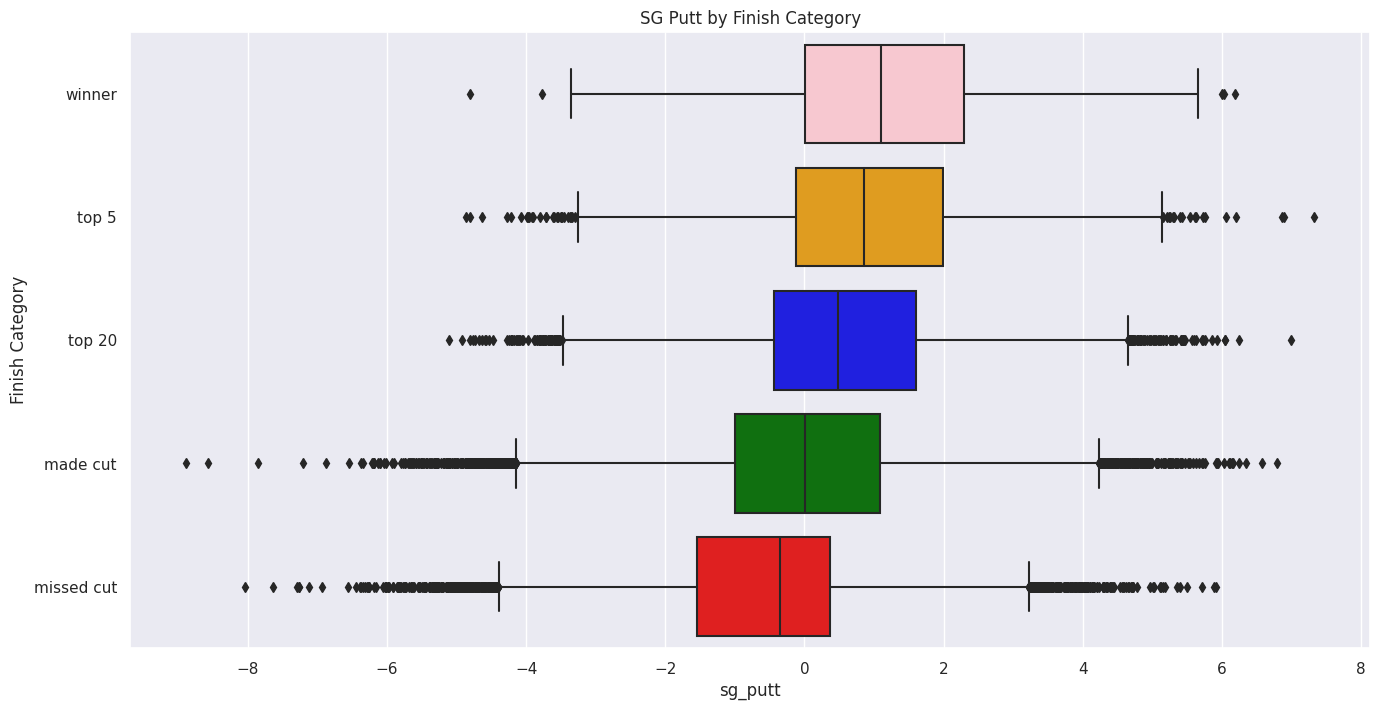

In [ ]:
dims = (16,8)
fig, ax = plt.subplots(figsize=dims)

#custom colors
colors = {'made cut': 'green','winner': 'pink', 'top 5': 'orange', 'top 10': 'yellow', 'top 20': 'blue', 'missed cut': 'red'}

#create boxplot with custom colors 
sns.boxplot(x='sg_putt', y='finish_category', data=pga_data, ax=ax, palette=colors)
ax.set_title('SG Putt by Finish Category')

ax.set_ylabel('Finish Category', fontsize=12)


Text(0, 0.5, 'Finish Category')

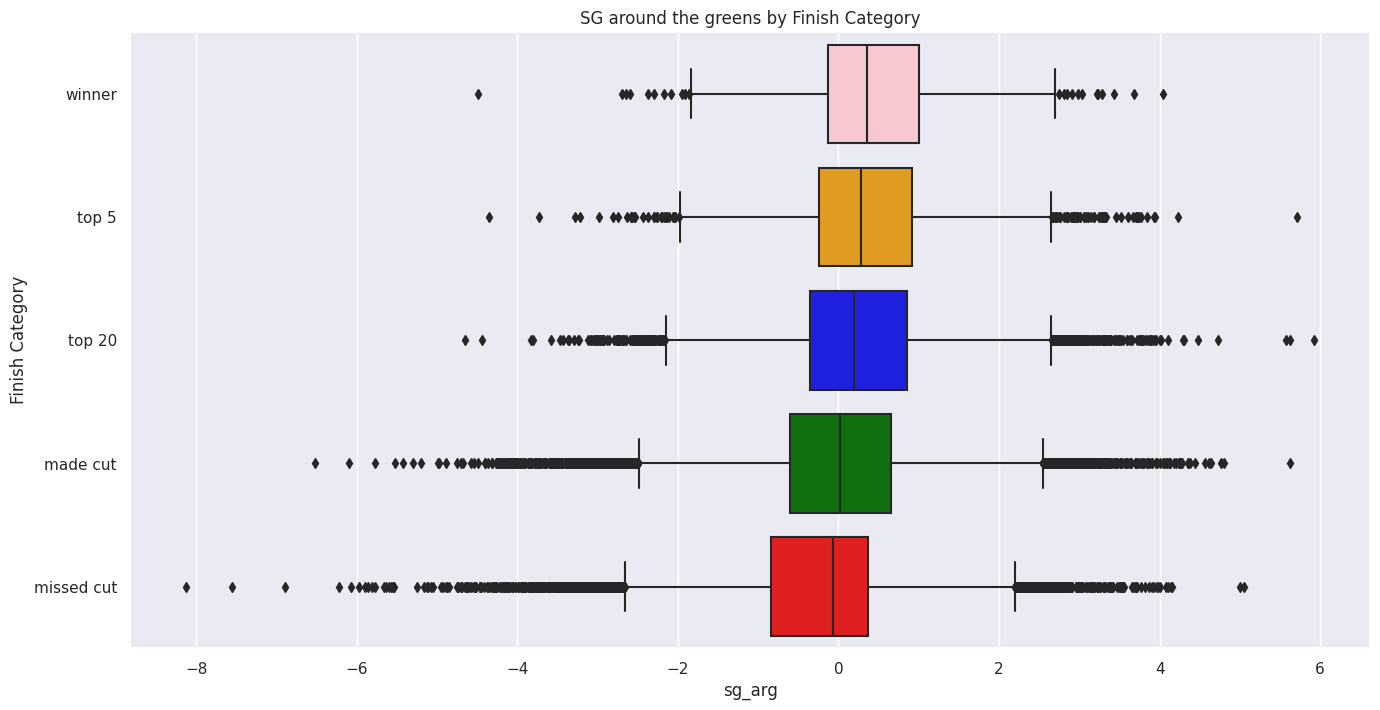

In [ ]:
dims = (16,8)
fig, ax = plt.subplots(figsize=dims)


colors = {'made cut': 'green','winner': 'pink', 'top 5': 'orange', 'top 10': 'yellow', 'top 20': 'blue', 'missed cut': 'red'}

sns.boxplot(x='sg_arg', y='finish_category', data=pga_data, ax=ax, palette=colors)
ax.set_title('SG around the greens by Finish Category')

ax.set_ylabel('Finish Category', fontsize=12)

Text(0, 0.5, 'Finish Category')

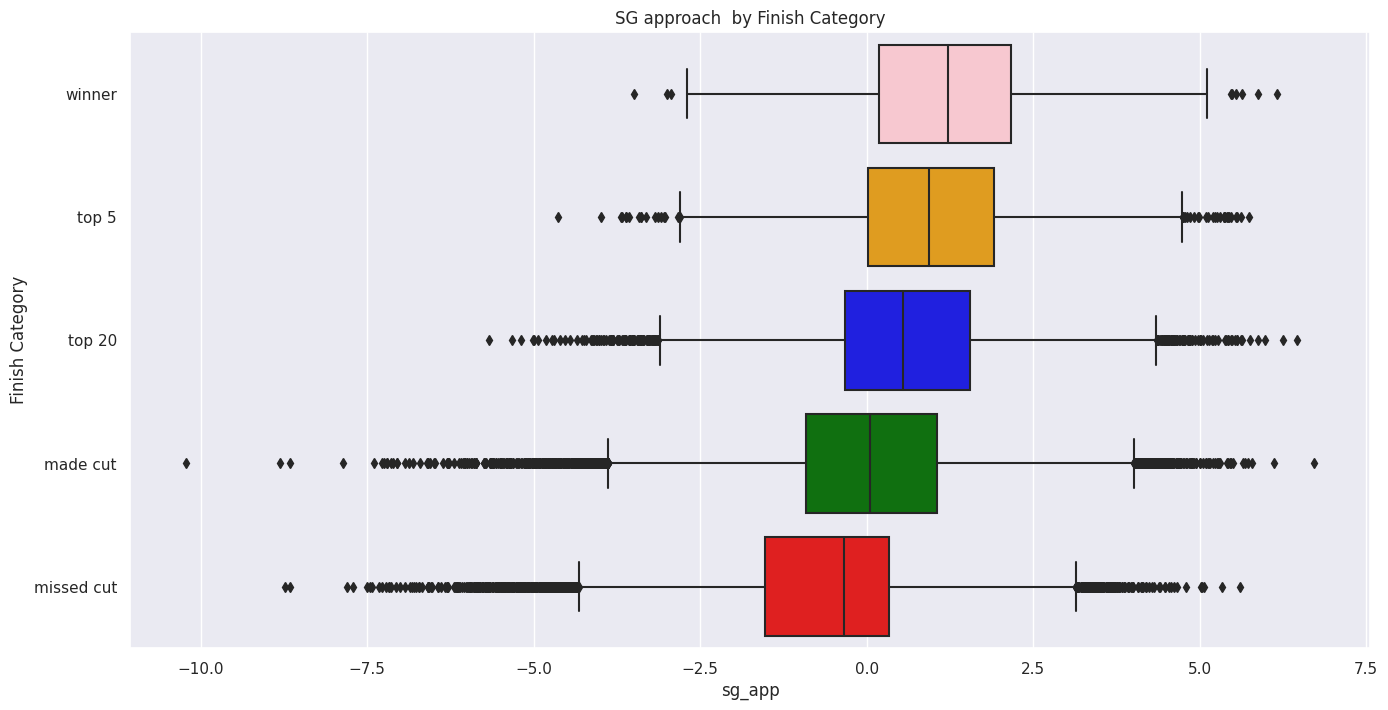

In [ ]:

dims = (16,8)
fig, ax = plt.subplots(figsize=dims)
colors = {'made cut': 'green','winner': 'pink', 'top 5': 'orange', 'top 10': 'yellow', 'top 20': 'blue', 'missed cut': 'red'}
sns.boxplot(x='sg_app', y='finish_category', data=pga_data, ax=ax, palette=colors)
ax.set_title('SG approach  by Finish Category')
ax.set_ylabel('Finish Category', fontsize=12)



Text(0, 0.5, 'Finish Category')

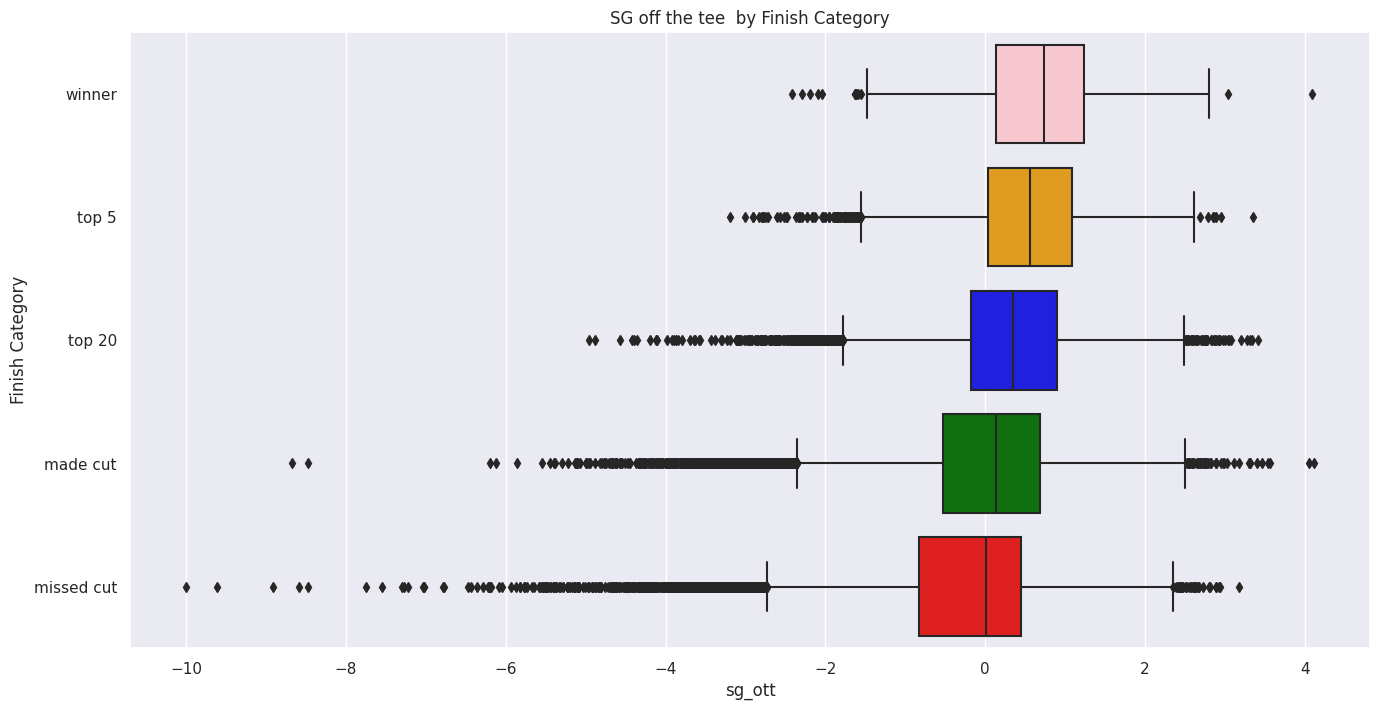

In [ ]:
dims = (16,8)
fig, ax = plt.subplots(figsize=dims)


colors = {'made cut': 'green','winner': 'pink', 'top 5': 'orange', 'top 10': 'yellow', 'top 20': 'blue', 'missed cut': 'red'}

sns.boxplot(x='sg_ott', y='finish_category', data=pga_data, ax=ax, palette=colors)
ax.set_title('SG off the tee  by Finish Category')

ax.set_ylabel('Finish Category', fontsize=12)

Text(0, 0.5, 'Finish Category')

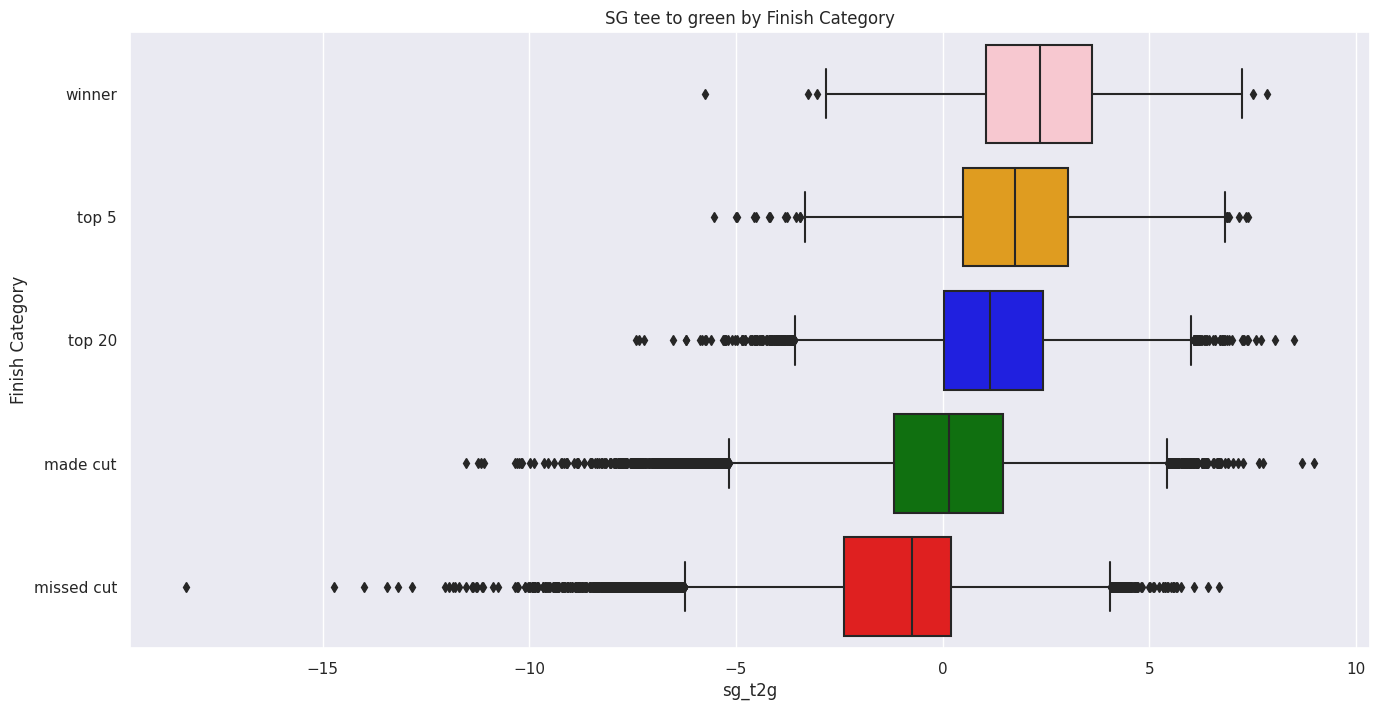

In [ ]:
dims = (16,8)
fig, ax = plt.subplots(figsize=dims)


colors = {'made cut': 'green','winner': 'pink', 'top 5': 'orange', 'top 10': 'yellow', 'top 20': 'blue', 'missed cut': 'red'}

sns.boxplot(x='sg_t2g', y='finish_category', data=pga_data, ax=ax, palette=colors)
ax.set_title('SG tee to green by Finish Category')

ax.set_ylabel('Finish Category', fontsize=12)

Text(0, 0.5, 'Finish Category')

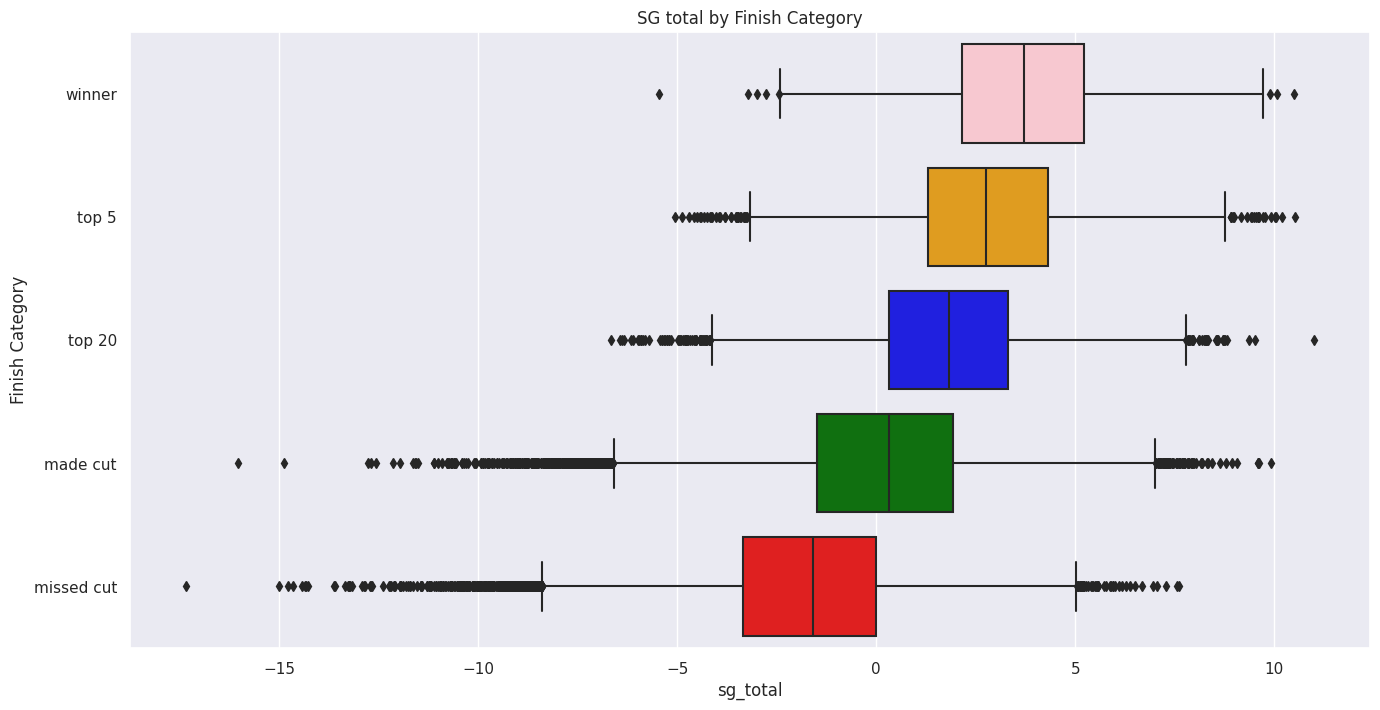

In [ ]:
dims = (16,8)
fig, ax = plt.subplots(figsize=dims)


colors = {'made cut': 'green','winner': 'pink', 'top 5': 'orange', 'top 10': 'yellow', 'top 20': 'blue', 'missed cut': 'red'}

sns.boxplot(x='sg_total', y='finish_category', data=pga_data, ax=ax, palette=colors)
ax.set_title('SG total by Finish Category')

ax.set_ylabel('Finish Category', fontsize=12)

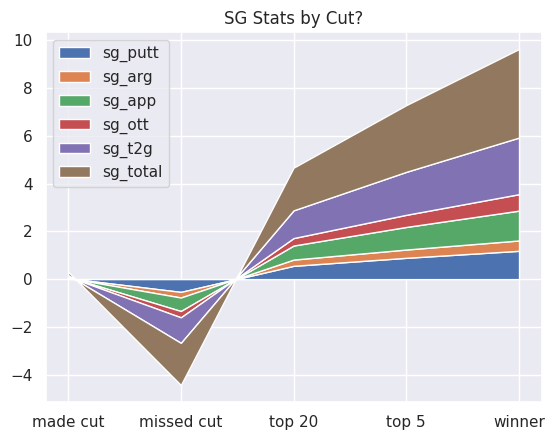

In [ ]:


sg_cut = pga_data.groupby("finish_category")[['sg_putt', 'sg_arg', 'sg_app', 'sg_ott', 'sg_t2g', 'sg_total']].mean()

# stacked area chart
plt.stackplot(sg_cut.index, sg_cut.T, labels=sg_cut.columns)

#add title
plt.title("SG Stats by Cut?")
plt.legend(loc='upper left')


plt.show()

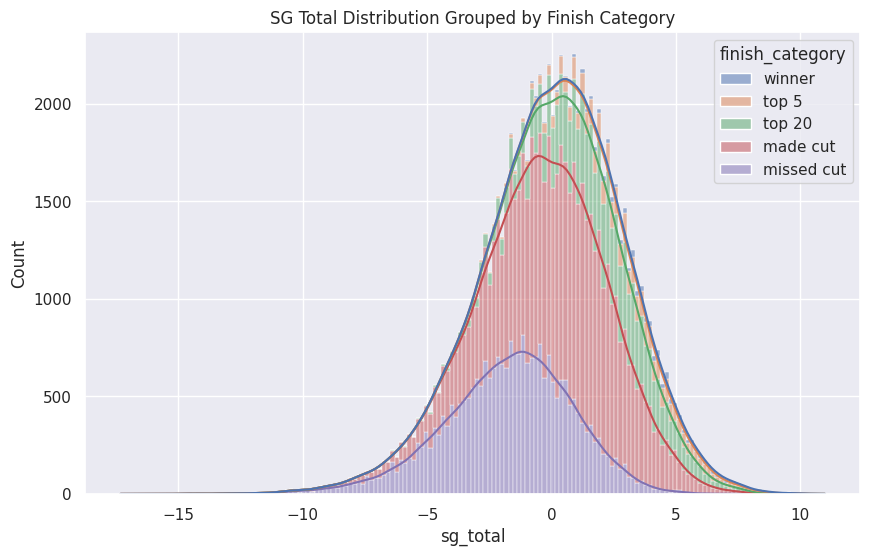

In [ ]:

plt.figure(figsize=(10, 6))

#Plot histograms
sns.histplot(data=pga_data, x="sg_total", hue="finish_category", kde=True, multiple="stack")

#plot title
plt.title("SG Total Distribution Grouped by Finish Category")

#Show plot
plt.show()


#Difference between those who make and miss a cut 


In [ ]:
#create two data frames: one for players who made a cut and another for players who missed the cut
made_cut_df = pga_data[pga_data['CUT?'] == 'made cut']
missed_cut_df = pga_data[pga_data['CUT?'] == 'missed cut']

#calculate the mean SG stats for each group
made_cut_sg_means = made_cut_df[['sg_putt', 'sg_arg', 'sg_app', 'sg_ott', 'sg_t2g', 'sg_total']].mean()
missed_cut_sg_means = missed_cut_df[['sg_putt', 'sg_arg', 'sg_app', 'sg_ott', 'sg_t2g', 'sg_total']].mean()

#create a new data frame to store the mean SG stats for each group
sg_comparison = pd.DataFrame({'made_cut_sg_means': made_cut_sg_means, 'missed_cut_sg_means': missed_cut_sg_means})

# display the data frame
print(sg_comparison)


          made_cut_sg_means  missed_cut_sg_means
sg_putt            0.233410            -0.536035
sg_arg             0.102375            -0.234526
sg_app             0.250129            -0.565398
sg_ott             0.126977            -0.264049
sg_t2g             0.477608            -1.069218
sg_total           0.766975            -1.763579


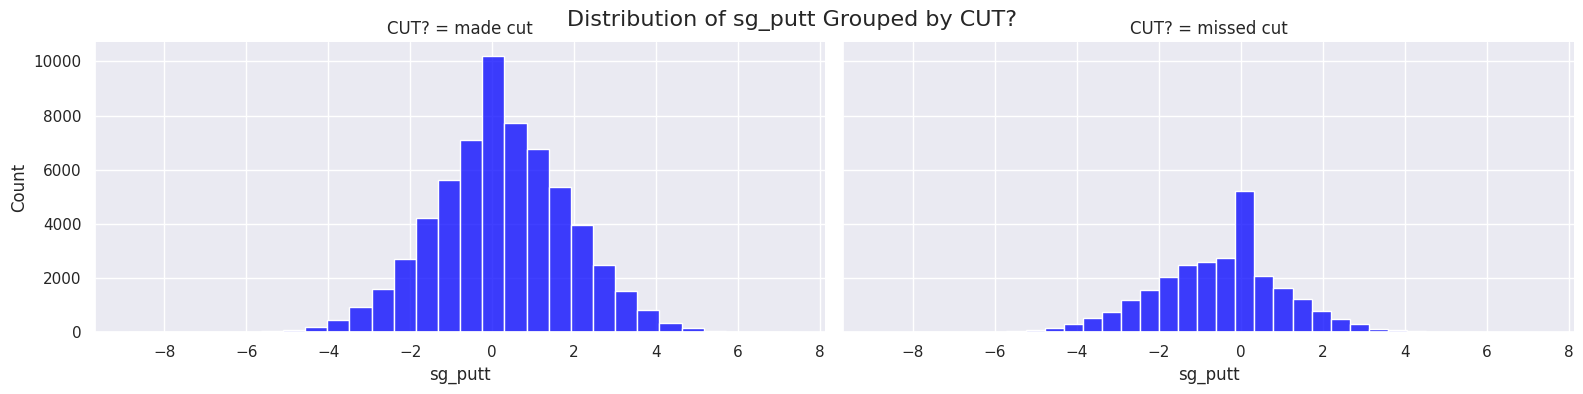

In [ ]:

# Create a subplot with the histogram of sg_putt grouped by CUT?
g = sns.FacetGrid(pga_data, col='CUT?', height=4, aspect=2, margin_titles=True)
g.map(sns.histplot, 'sg_putt', bins=30, color='blue')

# Set title and axis labels
g.fig.suptitle('Distribution of sg_putt Grouped by CUT?', fontsize=16)
g.set_axis_labels('sg_putt', 'Count')

# Show the plot
plt.show()

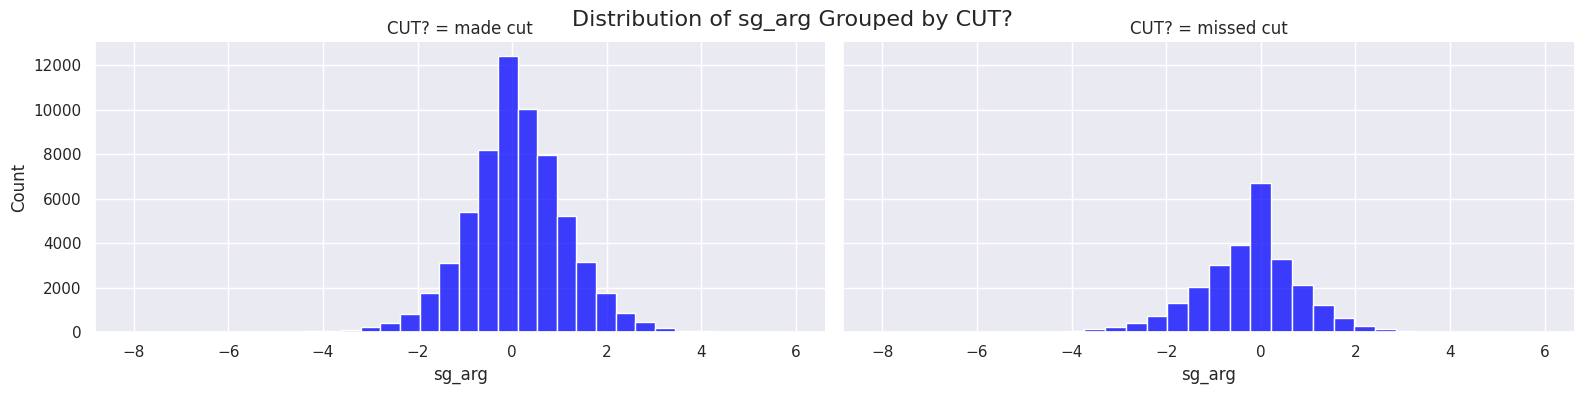

In [ ]:

g = sns.FacetGrid(pga_data, col='CUT?', height=4, aspect=2, margin_titles=True)
g.map(sns.histplot, 'sg_arg', bins=30, color='blue')


g.fig.suptitle('Distribution of sg_arg Grouped by CUT?', fontsize=16)
g.set_axis_labels('sg_arg', 'Count')


plt.show()

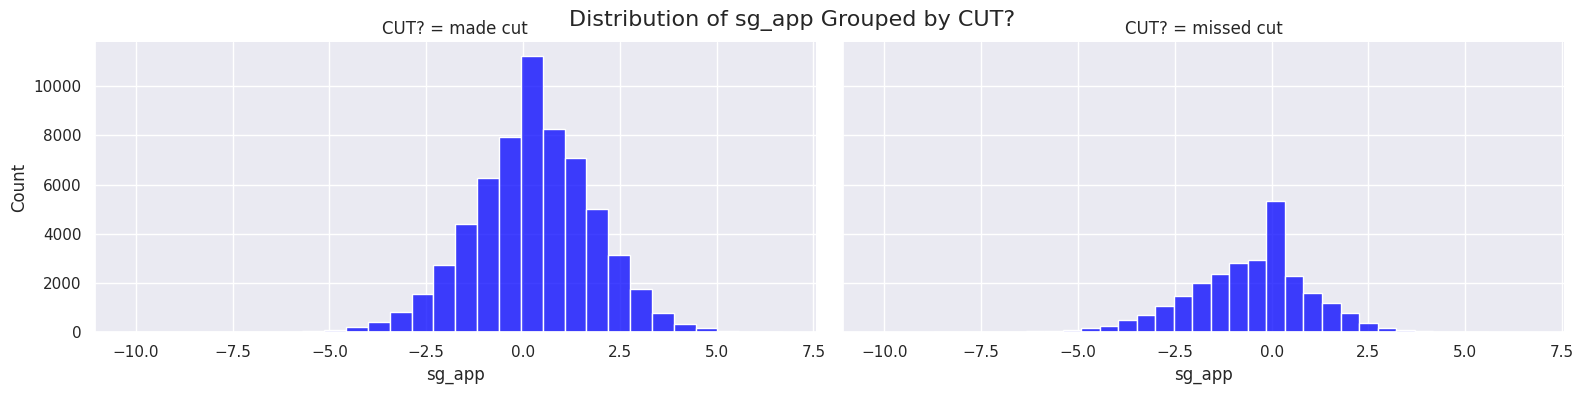

In [ ]:

g = sns.FacetGrid(pga_data, col='CUT?', height=4, aspect=2, margin_titles=True)
g.map(sns.histplot, 'sg_app', bins=30, color='blue')


g.fig.suptitle('Distribution of sg_app Grouped by CUT?', fontsize=16)
g.set_axis_labels('sg_app', 'Count')


plt.show()

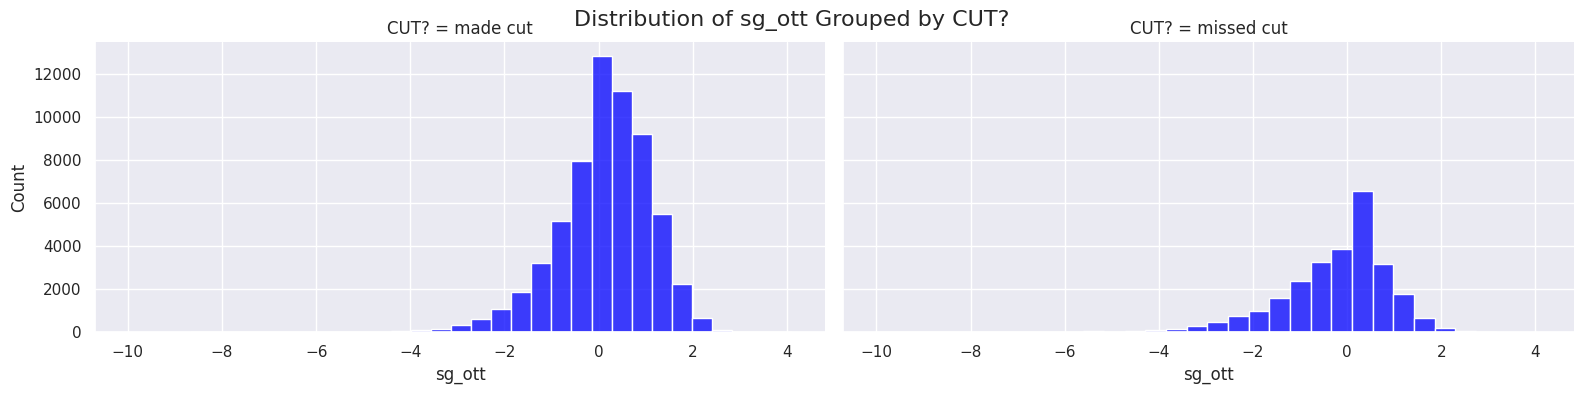

In [ ]:

g = sns.FacetGrid(pga_data, col='CUT?', height=4, aspect=2, margin_titles=True)
g.map(sns.histplot, 'sg_ott', bins=30, color='blue')


g.fig.suptitle('Distribution of sg_ott Grouped by CUT?', fontsize=16)
g.set_axis_labels('sg_ott', 'Count')


plt.show()

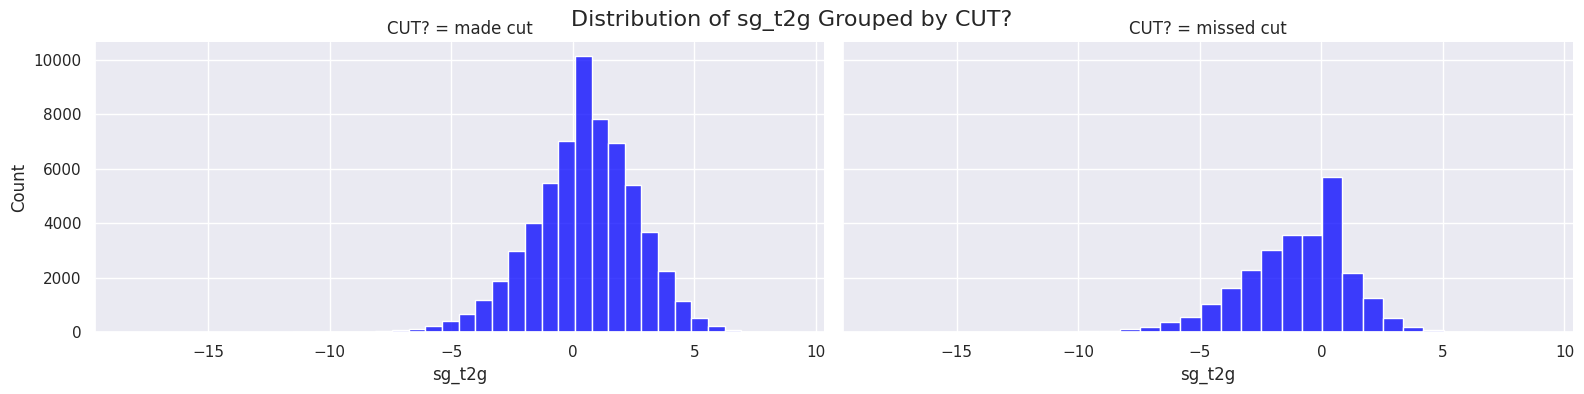

In [ ]:

g = sns.FacetGrid(pga_data, col='CUT?', height=4, aspect=2, margin_titles=True)
g.map(sns.histplot, 'sg_t2g', bins=30, color='blue')


g.fig.suptitle('Distribution of sg_t2g Grouped by CUT?', fontsize=16)
g.set_axis_labels('sg_t2g', 'Count')


plt.show()

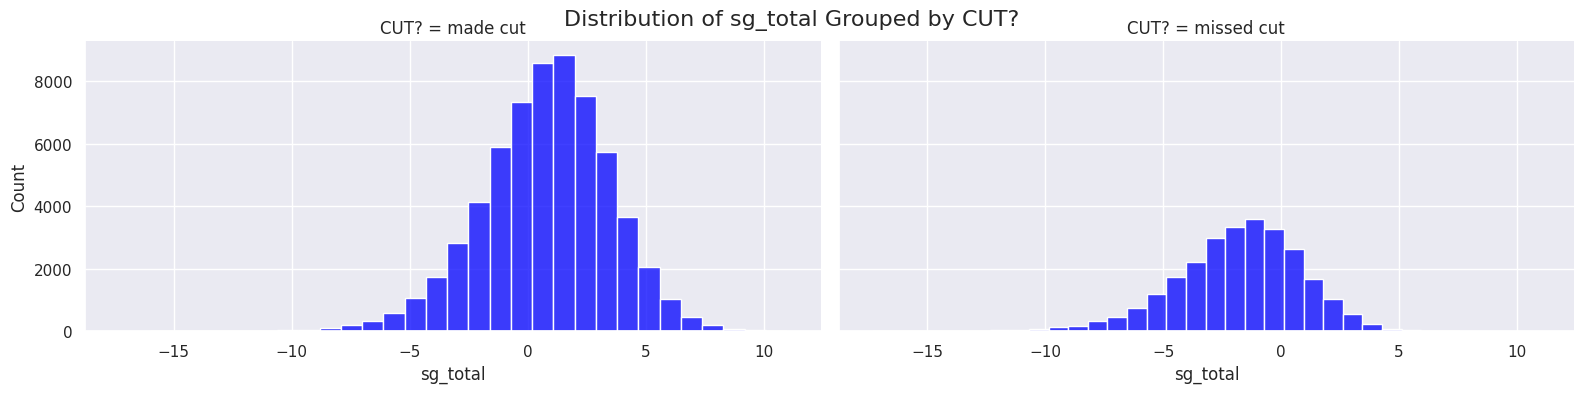

In [ ]:

g = sns.FacetGrid(pga_data, col='CUT?', height=4, aspect=2, margin_titles=True)
g.map(sns.histplot, 'sg_total', bins=30, color='blue')

g.fig.suptitle('Distribution of sg_total Grouped by CUT?', fontsize=16)
g.set_axis_labels('sg_total', 'Count')

plt.show()

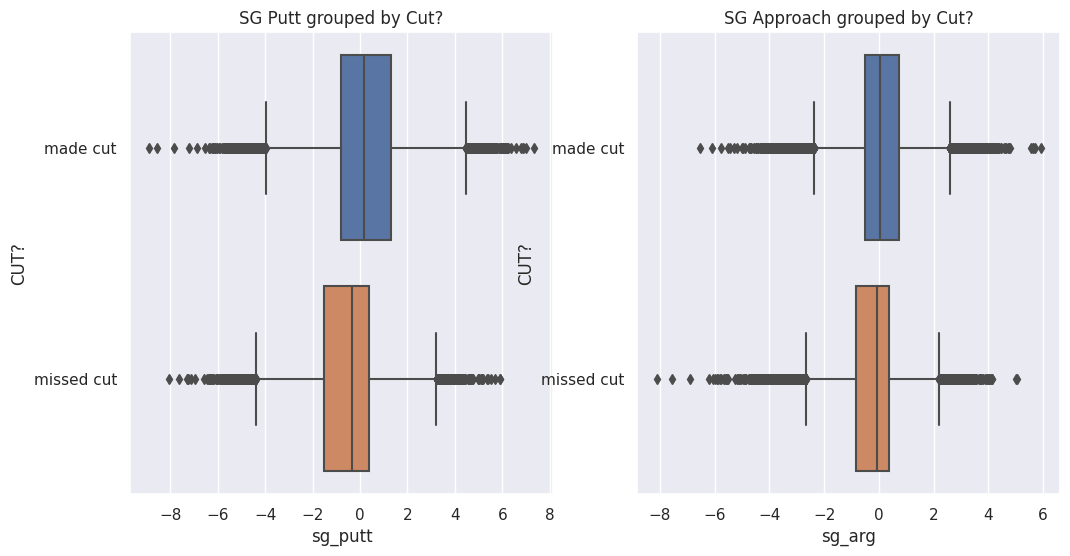

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))


sns.boxplot(x='sg_putt', y='CUT?', data=pga_data, ax=axs[0])
axs[0].set_title('SG Putt grouped by Cut?')


sns.boxplot(x='sg_arg', y='CUT?', data=pga_data, ax=axs[1])
axs[1].set_title('SG Approach grouped by Cut?')

plt.show()


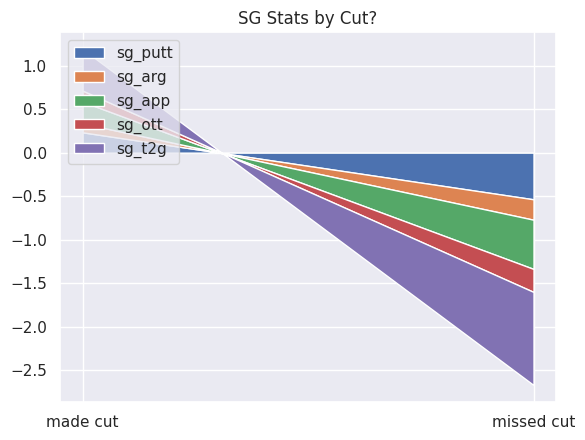

In [ ]:

import matplotlib.pyplot as plt

sg_cut = pga_data.groupby("CUT?")[['sg_putt', 'sg_arg', 'sg_app', 'sg_ott', 'sg_t2g']].mean()


plt.stackplot(sg_cut.index, sg_cut.T, labels=sg_cut.columns)


plt.title("SG Stats by Cut?")
plt.legend(loc='upper left')

plt.show()


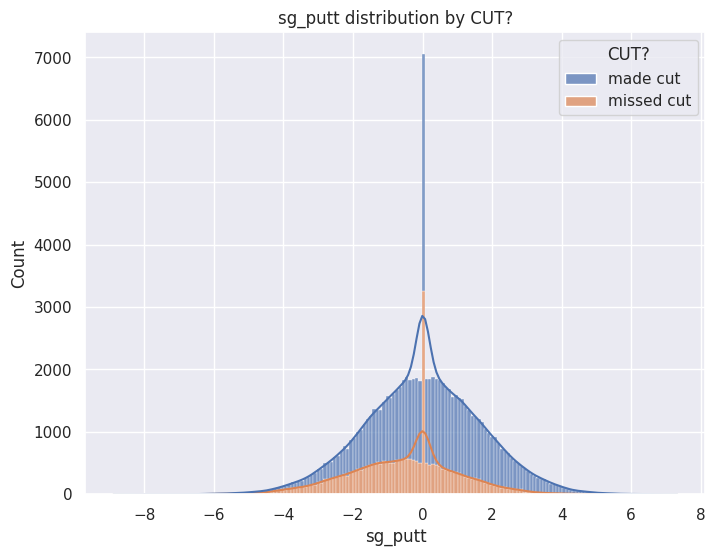

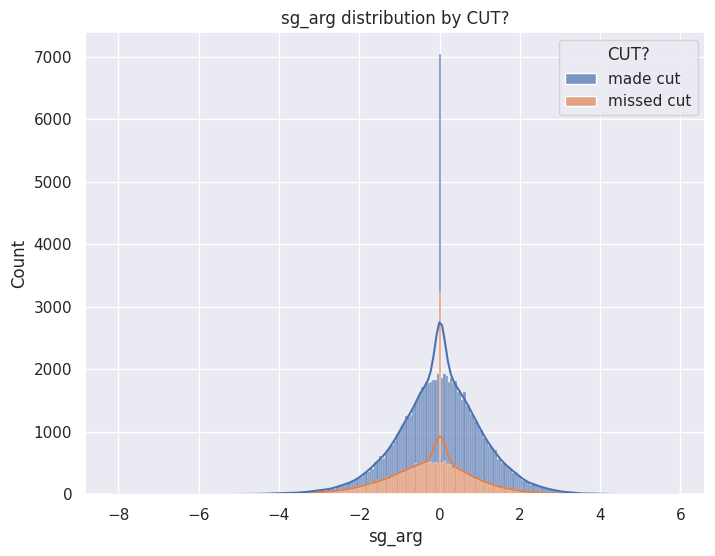

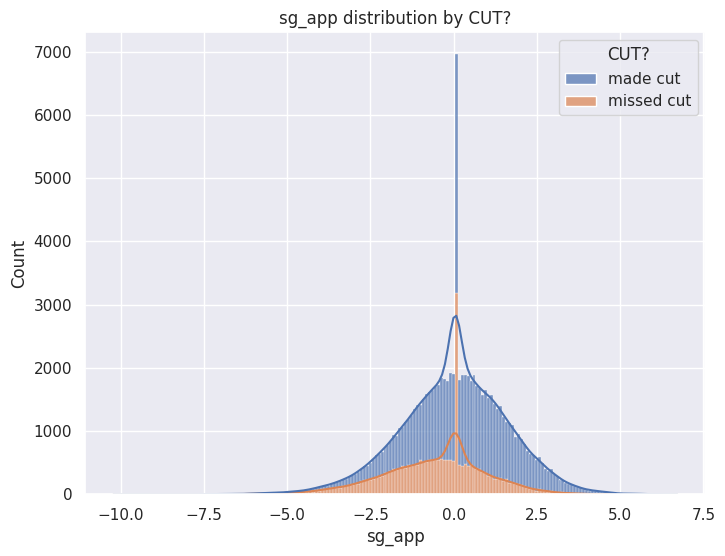

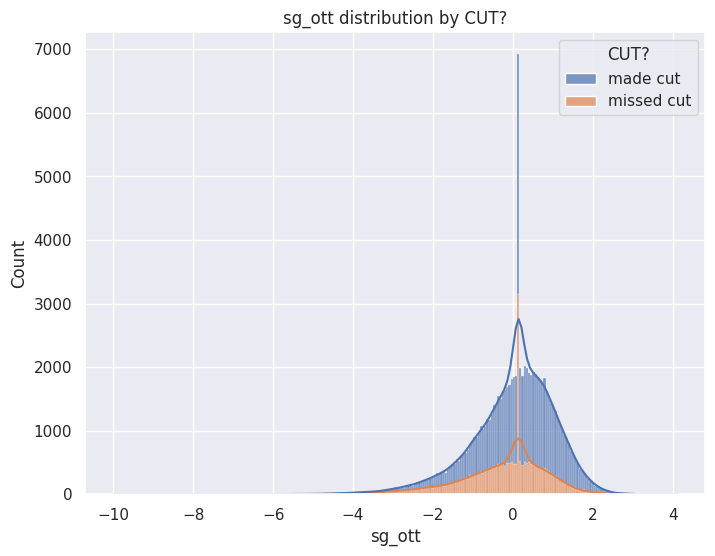

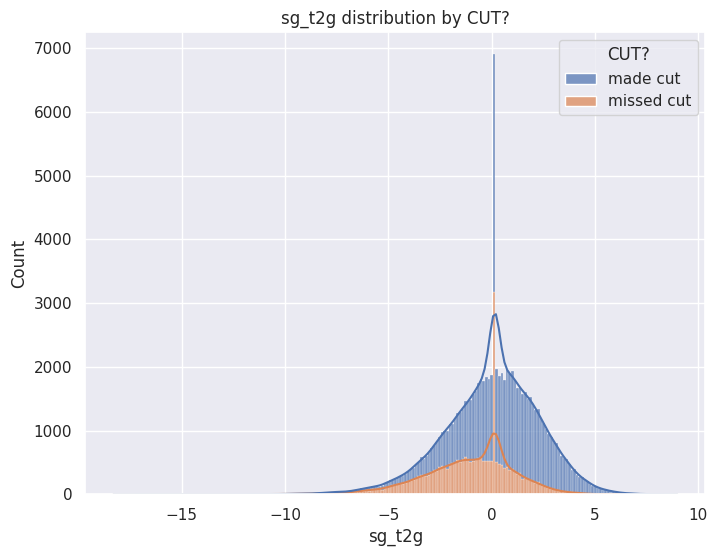

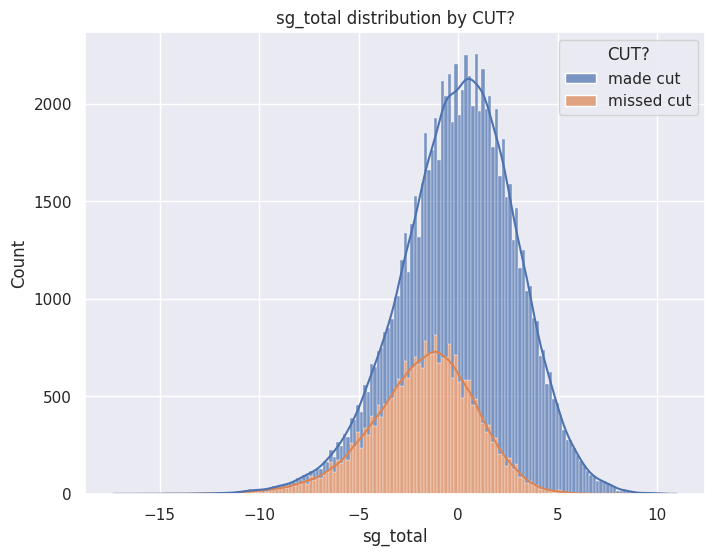

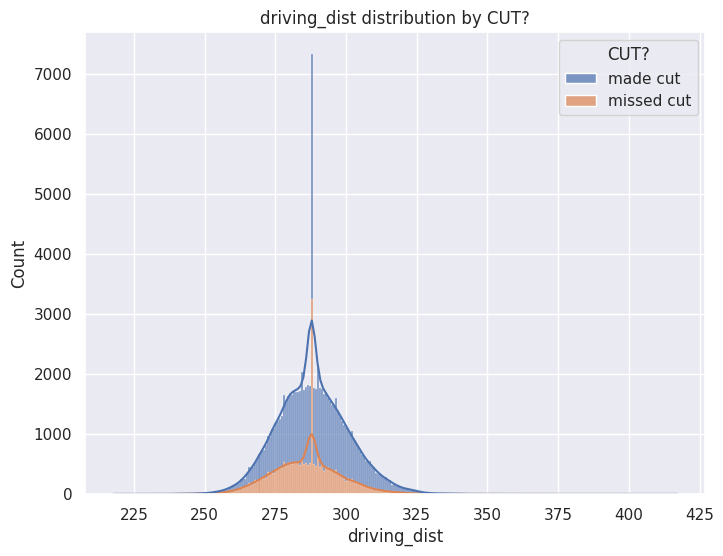

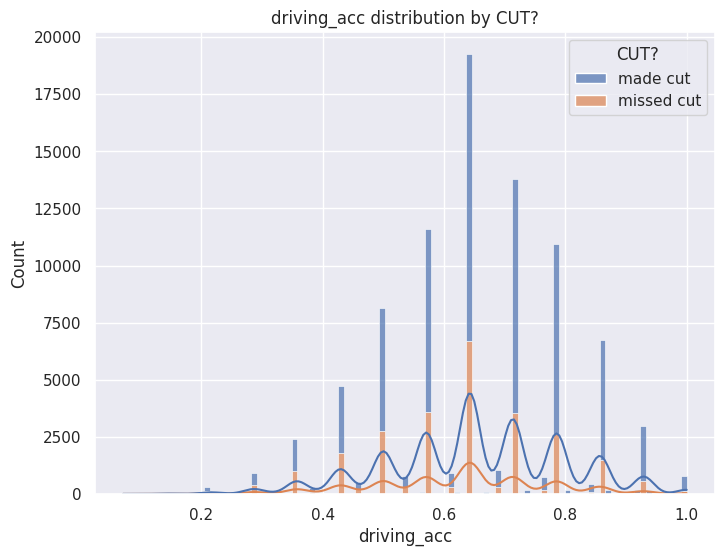

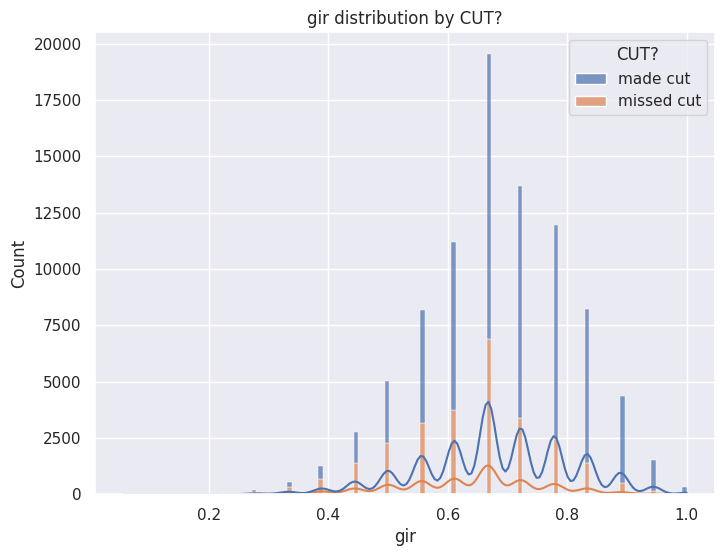

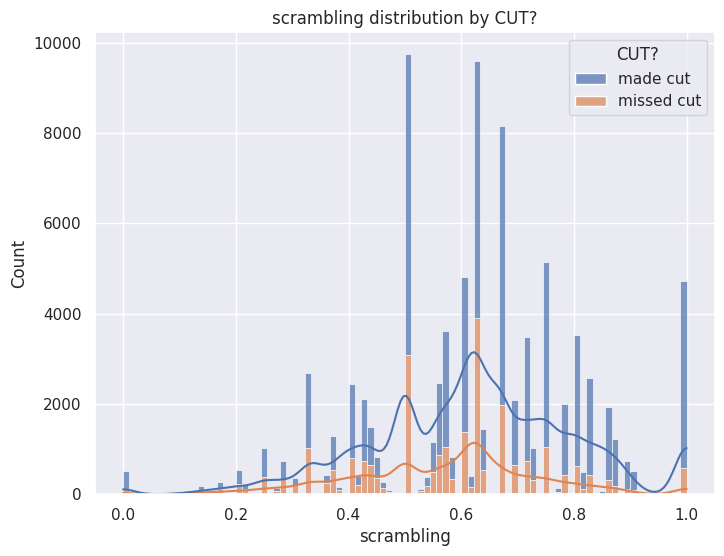

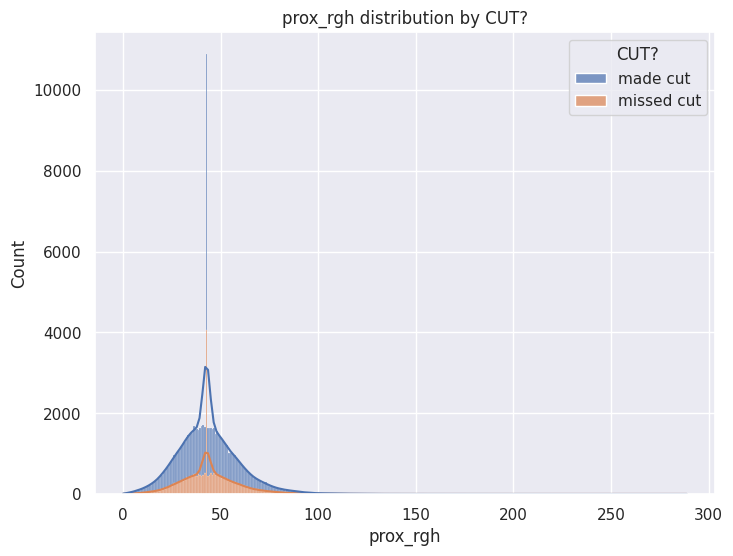

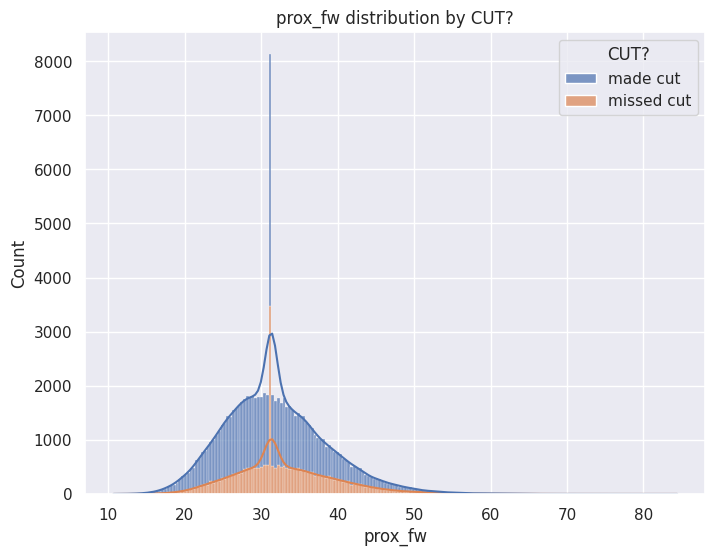

In [ ]:
#list of columns to plot
cols_to_plot = ['sg_putt', 'sg_arg', 'sg_app', 'sg_ott', 'sg_t2g', 'sg_total', 
                'driving_dist', 'driving_acc', 'gir', 'scrambling', 'prox_rgh', 'prox_fw']

#go through the columns and create histograms 
for col in cols_to_plot:
    plt.figure(figsize=(8,6))
    sns.histplot(data=pga_data, x=col, hue='CUT?', kde=True, multiple='stack', alpha=0.7)
    plt.title(f'{col} distribution by CUT?')
    plt.show()


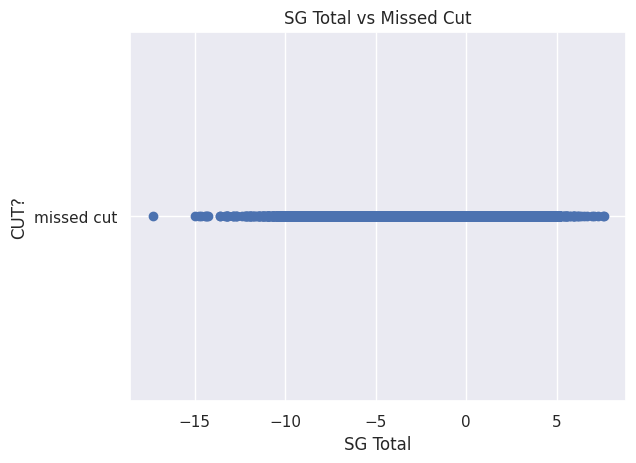

In [ ]:
# filter data for CUT? = missed cut
missed_cut_data = pga_data[pga_data['CUT?'] == 'missed cut']

# create scatter plot
plt.scatter(missed_cut_data['sg_total'], missed_cut_data['CUT?'])

# set plot title and axis labels
plt.title('SG Total vs Missed Cut')
plt.xlabel('SG Total')
plt.ylabel('CUT?')

# show plot
plt.show()



<Axes: xlabel='sg_total', ylabel='finish_category'>

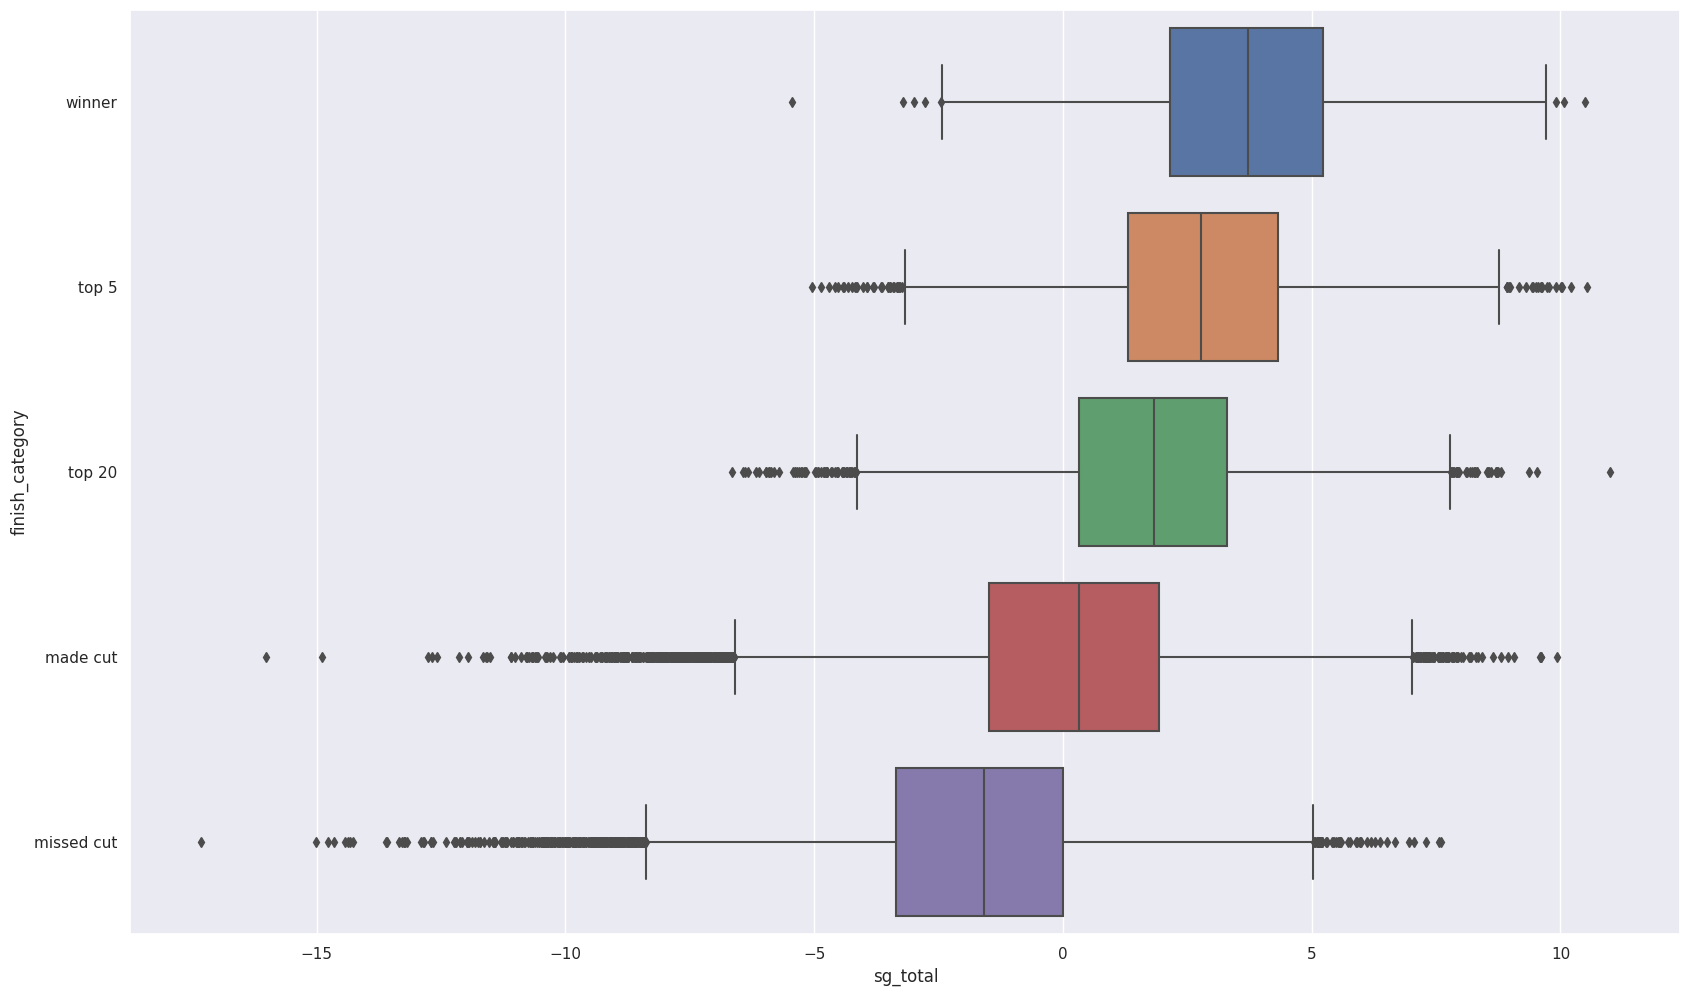

In [ ]:
dims = (20,12)
fig, ax = plt.subplots(figsize=dims)
sns.boxplot(x='sg_total', y='finish_category', data=pga_data, ax=ax)

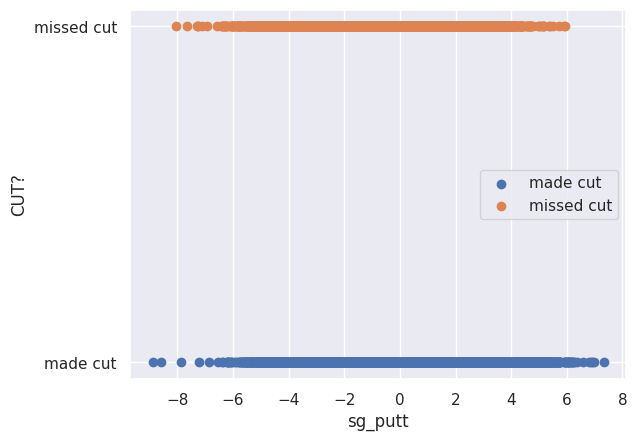

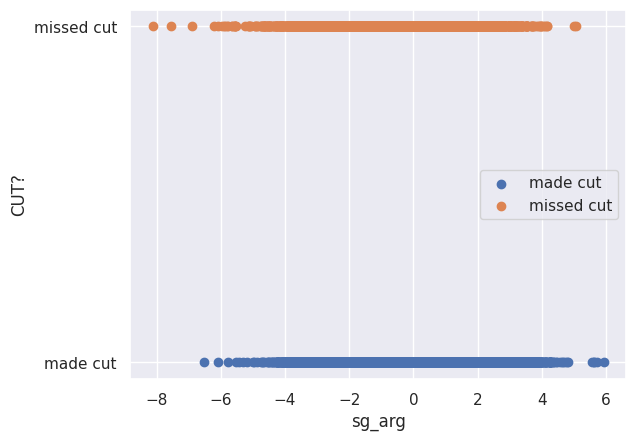

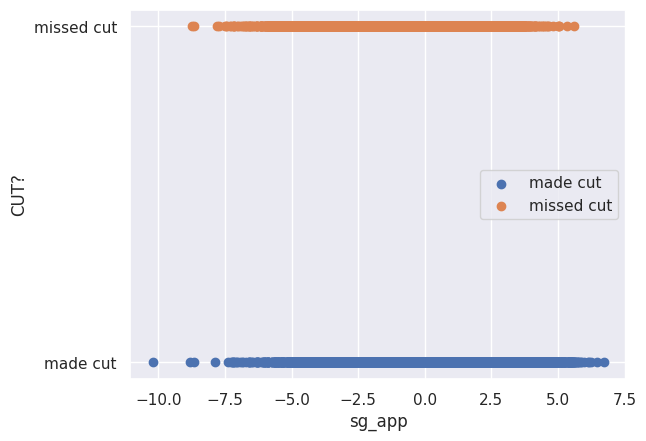

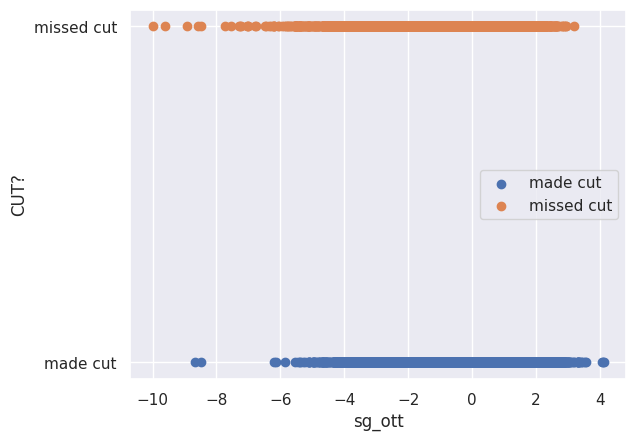

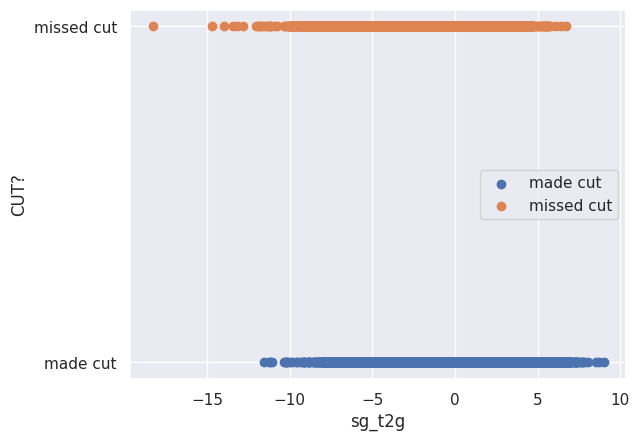

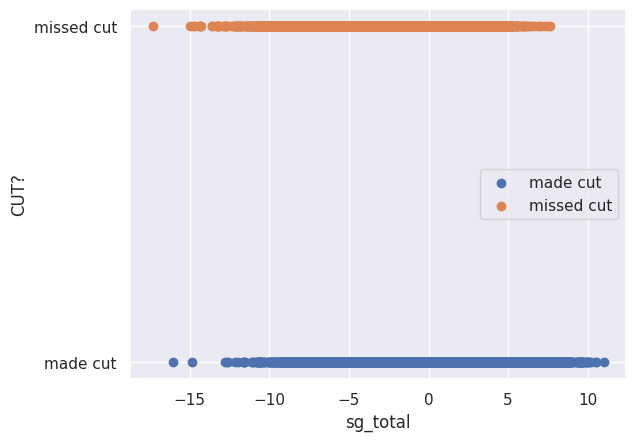

In [ ]:

made_cut_mask = pga_data['CUT?'] == 'made cut'
missed_cut_mask = pga_data['CUT?'] == 'missed cut'


for sg_stat in sg_stats:
    plt.scatter(pga_data[made_cut_mask][sg_stat], pga_data[made_cut_mask]['CUT?'], label='made cut')
    plt.scatter(pga_data[missed_cut_mask][sg_stat], pga_data[missed_cut_mask]['CUT?'], label='missed cut')
    plt.xlabel(sg_stat)
    plt.ylabel('CUT?')
    plt.legend()
    plt.show()


In [ ]:
made_cut_counts = pga_data[pga_data['CUT?'] == 'made cut'].groupby(['player_name', 'event_name', 'year', 'dg_id'])['CUT?'].count()
top10_made_cut_players = made_cut_counts.groupby('player_name').count().nlargest(10)
print(top10_made_cut_players)


player_name
Harman, Brian        106
Finau, Tony          104
Bradley, Keegan       98
Hadwin, Adam          98
Matsuyama, Hideki     98
Streelman, Kevin      98
Reed, Patrick         97
Kokrak, Jason         95
Glover, Lucas         94
Horschel, Billy       93
Name: CUT?, dtype: int64


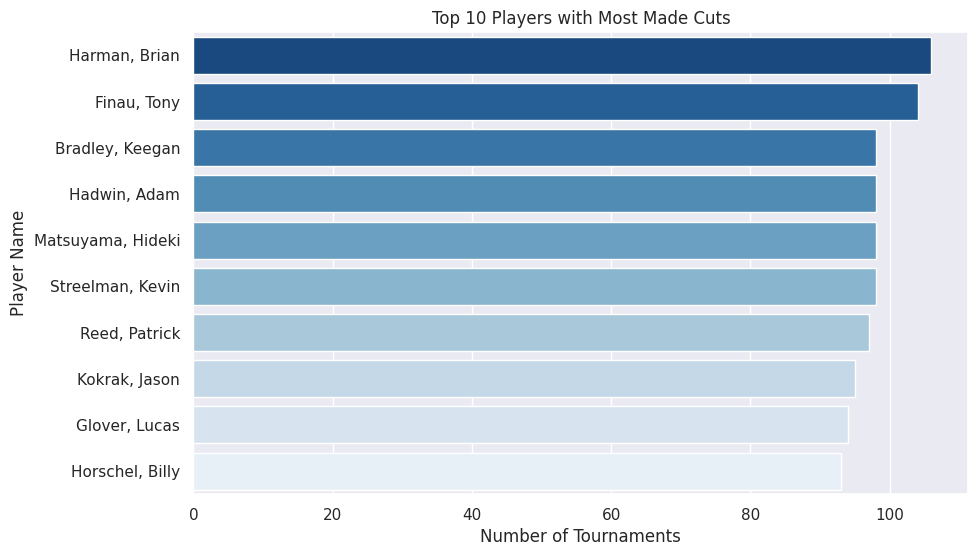

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x=top10_made_cut_players.values, y=top10_made_cut_players.index, palette='Blues_r')
plt.title('Top 10 Players with Most Made Cuts')
plt.xlabel('Number of Tournaments')
plt.ylabel('Player Name')
plt.show()


In [ ]:
missed_cut_counts = pga_data[pga_data['CUT?'] == 'missed cut'].groupby(['player_name', 'event_name', 'year', 'dg_id'])['CUT?'].count()
top10_missed_cut_players = missed_cut_counts.groupby('player_name').count().nlargest(10)
print(top10_missed_cut_players)


player_name
Streb, Robert      85
Hoge, Tom          70
Kim, Michael       70
Werenski, Richy    70
Brown, Scott       69
Trainer, Martin    68
Kang, Sung         67
Malnati, Peter     67
Stuard, Brian      67
Tway, Kevin        67
Name: CUT?, dtype: int64


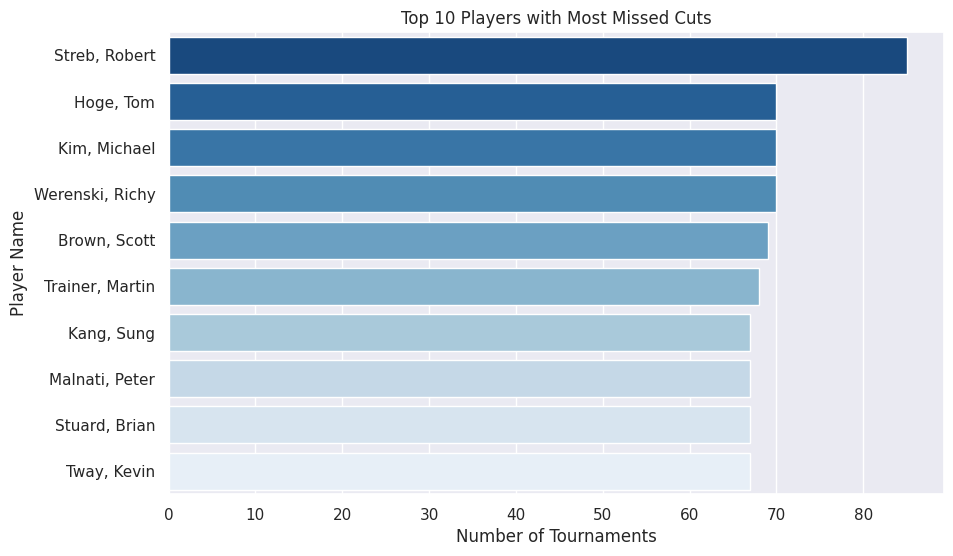

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x=top10_missed_cut_players.values, y=top10_missed_cut_players.index, palette='Blues_r')
plt.title('Top 10 Players with Most Missed Cuts')
plt.xlabel('Number of Tournaments')
plt.ylabel('Player Name')
plt.show()


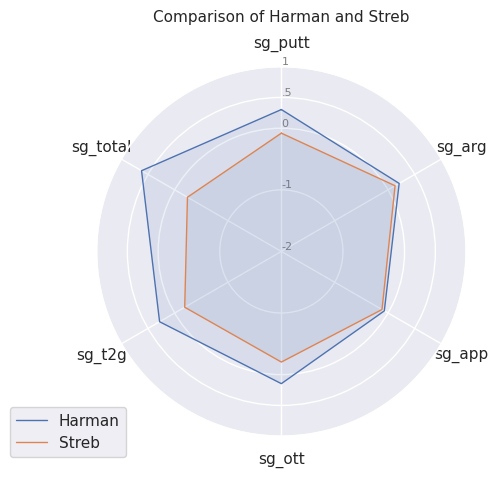

In [ ]:

#Create a DataFrame with the variables  to compare
variables = ['sg_putt', 'sg_arg', 'sg_app', 'sg_ott', 'sg_t2g', 'sg_total']
harman_data = pga_data[pga_data['player_name'] == 'Harman, Brian'][variables].mean()
streb_data = pga_data[pga_data['player_name'] == 'Streb, Robert'][variables].mean()
data = pd.DataFrame({'Harman': harman_data, 'Streb': streb_data})

#function to plot the radar chart
def radar_chart(df, title):
    categories=list(df.index)
    N = len(categories)

    angles = [n / float(N) * 2 * np.pi for n in range(N)]
    angles += angles[:1]

    ax = plt.subplot(111, polar=True)

    ax.set_theta_offset(np.pi / 2)
    ax.set_theta_direction(-1)

    plt.xticks(angles[:-1], categories)

    ax.set_rlabel_position(0)
    plt.yticks([-2,-1,0,.5,1,], ["-2","-1","0",".5","1",], color="grey", size=8)
    plt.ylim(-2, 1)

    for i in range(len(df.columns)):
        values=df.iloc[:,i].values.flatten().tolist()
        values += values[:1]
        ax.plot(angles, values, linewidth=1, linestyle='solid', label=df.columns[i])
        ax.fill(angles, values, 'b', alpha=0.1)

    plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

    plt.title(title, size=11, y=1.1)


#Plot the  chart
radar_chart(data, 'Comparison of Harman and Streb')
plt.show()


# Feature Selection

In [ ]:
# Create a binary variable for cut status
pga_data['cut_binary'] = np.where(pga_data['CUT?'] == 'made cut', 1, 0)

Optimal number of features : 6


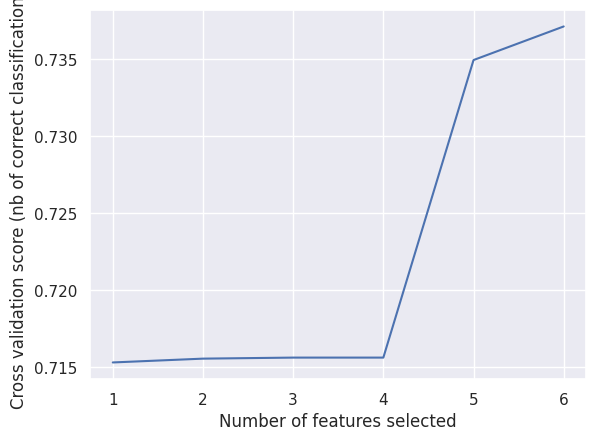

   Variable  Ranking
0   sg_putt        1
1    sg_arg        1
2    sg_app        1
3    sg_ott        1
4    sg_t2g        1
5  sg_total        1


In [ ]:
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold

#Create the predictor and target variables
X = pga_data[variables]
y = pga_data['CUT?']

#Create a logistic regression object
lr = LogisticRegression(max_iter=10000)

#Create recursive feature eliminator that scores features by mean cross-validation score
rfecv = RFECV(estimator=lr, step=1, cv=StratifiedKFold(5), scoring='accuracy')

#Fit recursive feature eliminator 
rfecv.fit(X, y)

#Print the optimal number of features
print("Optimal number of features : %d" % rfecv.n_features_)


plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.cv_results_['mean_test_score']) + 1), rfecv.cv_results_['mean_test_score'])
plt.show()


selected_features = pd.DataFrame({'Variable': X.columns,
                                   'Ranking': rfecv.ranking_})
# Print the selected features
print(selected_features[selected_features['Ranking']==1])


In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

X = pga_data[[
       'course_par', 'round_score', 'sg_putt', 'sg_arg', 'sg_app', 'sg_ott',
       'sg_t2g', 'sg_total', 'driving_dist', 'driving_acc', 'gir',
       'scrambling', 'prox_rgh', 'prox_fw',
       'cut_binary']].values
y = np.where(pga_data['CUT?'] == 'made cut', 1, 0)

#Initialize the logistic regression model
logreg = LogisticRegression(max_iter=10000)

#Initialize the RFE model
rfe = RFE(logreg, n_features_to_select=6)

#Fit the RFE model
rfe.fit(X, y)

#Print the selected features
selected_features = pga_data[['course_par', 'round_score', 'sg_putt', 'sg_arg', 'sg_app', 'sg_ott',
       'sg_t2g', 'sg_total', 'driving_dist', 'driving_acc', 'gir',
       'scrambling', 'prox_rgh', 'prox_fw',
       'cut_binary']].columns[rfe.support_]
print('Selected features:', selected_features)


Selected features: Index(['round_score', 'sg_putt', 'sg_t2g', 'sg_total', 'driving_acc',
       'cut_binary'],
      dtype='object')


In [ ]:
pga_data

tour  year  season                      event_name  event_id  \
0      pga  2018    2018  SENTRY TOURNAMENT OF CHAMPIONS        16   
1      pga  2018    2018  SENTRY TOURNAMENT OF CHAMPIONS        16   
2      pga  2018    2018  SENTRY TOURNAMENT OF CHAMPIONS        16   
3      pga  2018    2018  SENTRY TOURNAMENT OF CHAMPIONS        16   
4      pga  2018    2018  SENTRY TOURNAMENT OF CHAMPIONS        16   
...    ...   ...     ...                             ...       ...   
89273  pga  2022    2023                 THE RSM CLASSIC       493   
89274  pga  2022    2023                 THE RSM CLASSIC       493   
89275  pga  2022    2023                 THE RSM CLASSIC       493   
89276  pga  2022    2023                 THE RSM CLASSIC       493   
89277  pga  2022    2023                 THE RSM CLASSIC       493   

           player_name  dg_id fin_text  round_num  \
0      Johnson, Dustin  12422        1          1   
1      Johnson, Dustin  12422        1          2   
2      Johnson, Dustin  12422        1          3   
3      Johnson, Dustin  12422        1          4   
4            Rahm, Jon  19195        2          1   
...                ...    ...      ...        ...   
89273       Goya, Tano  10877      CUT          2   
89274  Werenski, Richy  19364      CUT          1   
89275  Werenski, Richy  19364      CUT          2   
89276   Nimmer, Bryson  26013      CUT          1   
89277   Nimmer, Bryson  26013      CUT          2   

                             course_name  ...  scrambling  prox_rgh  prox_fw  \
0           PLANTATION COURSE AT KAPALUA  ...       0.636    37.670   42.914   
1           PLANTATION COURSE AT KAPALUA  ...       0.667    29.627   44.661   
2           PLANTATION COURSE AT KAPALUA  ...       0.600    23.679   34.623   
3           PLANTATION COURSE AT KAPALUA  ...       0.857    36.246   46.068   
4           PLANTATION COURSE AT KAPALUA  ...       0.636    38.424   36.003   
...                                  ...  ...         ...       ...      ...   
89273  SEA ISLAND GOLF CLUB (PLANTATION)  ...       0.625    42.721   31.320   
89274     SEA ISLAND GOLF CLUB (SEASIDE)  ...       0.375    71.091   32.874   
89275  SEA ISLAND GOLF CLUB (PLANTATION)  ...       0.625    42.721   31.320   
89276     SEA ISLAND GOLF CLUB (SEASIDE)  ...       0.250    33.532   44.120   
89277  SEA ISLAND GOLF CLUB (PLANTATION)  ...       0.625    42.721   31.320   

       finish_category        CUT?  top_5_binary  top_20_binary  \
0               winner    made cut             0              0   
1               winner    made cut             0              0   
2               winner    made cut             0              0   
3               winner    made cut             0              0   
4                top 5    made cut             1              0   
...                ...         ...           ...            ...   
89273       missed cut  missed cut             0              0   
89274       missed cut  missed cut             0              0   
89275       missed cut  missed cut             0              0   
89276       missed cut  missed cut             0              0   
89277       missed cut  missed cut             0              0   

       made_cut_binary  winner_binary  cut_binary  
0                    1              1           1  
1                    1              1           1  
2                    1              1           1  
3                    1              1           1  
4                    1              0           1  
...                ...            ...         ...  
89273                0              0           0  
89274                0              0           0  
89275                0              0           0  
89276                0              0           0  
89277                0              0           0  

[88852 rows x 32 columns]

In [ ]:
# count the number of rows for each unique value in the "Name" column
counts = pga_data['finish_category'].value_counts()
print(counts)

made cut      42509
missed cut    26442
top 20        14555
top 5          4465
winner          881
Name: finish_category, dtype: int64


In [ ]:
# count the number of rows for each unique value in the "Name" column
counts = pga_data['CUT?'].value_counts()
print(counts)

made cut      62410
missed cut    26442
Name: CUT?, dtype: int64


In [ ]:
#Save the dataframe as a new csv file named cut_analysis
pga_data.to_csv('/content/drive/MyDrive/cut_analysis.csv', index=False)


In [ ]:
pga_data

tour  year  season                      event_name  event_id  \
0      pga  2018    2018  SENTRY TOURNAMENT OF CHAMPIONS        16   
1      pga  2018    2018  SENTRY TOURNAMENT OF CHAMPIONS        16   
2      pga  2018    2018  SENTRY TOURNAMENT OF CHAMPIONS        16   
3      pga  2018    2018  SENTRY TOURNAMENT OF CHAMPIONS        16   
4      pga  2018    2018  SENTRY TOURNAMENT OF CHAMPIONS        16   
...    ...   ...     ...                             ...       ...   
89273  pga  2022    2023                 THE RSM CLASSIC       493   
89274  pga  2022    2023                 THE RSM CLASSIC       493   
89275  pga  2022    2023                 THE RSM CLASSIC       493   
89276  pga  2022    2023                 THE RSM CLASSIC       493   
89277  pga  2022    2023                 THE RSM CLASSIC       493   

           player_name  dg_id fin_text  round_num  \
0      Johnson, Dustin  12422        1          1   
1      Johnson, Dustin  12422        1          2   
2      Johnson, Dustin  12422        1          3   
3      Johnson, Dustin  12422        1          4   
4            Rahm, Jon  19195        2          1   
...                ...    ...      ...        ...   
89273       Goya, Tano  10877      CUT          2   
89274  Werenski, Richy  19364      CUT          1   
89275  Werenski, Richy  19364      CUT          2   
89276   Nimmer, Bryson  26013      CUT          1   
89277   Nimmer, Bryson  26013      CUT          2   

                             course_name  ...  scrambling  prox_rgh  prox_fw  \
0           PLANTATION COURSE AT KAPALUA  ...       0.636    37.670   42.914   
1           PLANTATION COURSE AT KAPALUA  ...       0.667    29.627   44.661   
2           PLANTATION COURSE AT KAPALUA  ...       0.600    23.679   34.623   
3           PLANTATION COURSE AT KAPALUA  ...       0.857    36.246   46.068   
4           PLANTATION COURSE AT KAPALUA  ...       0.636    38.424   36.003   
...                                  ...  ...         ...       ...      ...   
89273  SEA ISLAND GOLF CLUB (PLANTATION)  ...       0.625    42.721   31.320   
89274     SEA ISLAND GOLF CLUB (SEASIDE)  ...       0.375    71.091   32.874   
89275  SEA ISLAND GOLF CLUB (PLANTATION)  ...       0.625    42.721   31.320   
89276     SEA ISLAND GOLF CLUB (SEASIDE)  ...       0.250    33.532   44.120   
89277  SEA ISLAND GOLF CLUB (PLANTATION)  ...       0.625    42.721   31.320   

       finish_category        CUT?  top_5_binary  top_20_binary  \
0               winner    made cut             0              0   
1               winner    made cut             0              0   
2               winner    made cut             0              0   
3               winner    made cut             0              0   
4                top 5    made cut             1              0   
...                ...         ...           ...            ...   
89273       missed cut  missed cut             0              0   
89274       missed cut  missed cut             0              0   
89275       missed cut  missed cut             0              0   
89276       missed cut  missed cut             0              0   
89277       missed cut  missed cut             0              0   

       made_cut_binary  winner_binary  cut_binary  
0                    1              1           1  
1                    1              1           1  
2                    1              1           1  
3                    1              1           1  
4                    1              0           1  
...                ...            ...         ...  
89273                0              0           0  
89274                0              0           0  
89275                0              0           0  
89276                0              0           0  
89277                0              0           0  

[88852 rows x 32 columns]